In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
import warnings; warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# train.csv

In [2]:
train=pd.read_csv('train.csv',encoding='cp949')

In [3]:
train

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18
...,...,...,...,...,...
19003,2020-11-08 19:00:00,124,123,19,3128
19004,2020-11-08 20:00:00,166,159,29,4864
19005,2020-11-08 21:00:00,184,173,32,3426
19006,2020-11-08 22:00:00,163,155,34,2845


In [4]:
train['DateTime']=pd.to_datetime(train['DateTime'])

In [184]:
train['년도&월']=train['DateTime'].dt.to_period('M')
year_month=train.groupby('년도&월').mean().reset_index()

In [185]:
year_month

,년도&월,사용자,세션,신규방문자,페이지뷰
0,2018-09,9.433712,8.892045,1.967803,67.316288
1,2018-10,6.213710,6.198925,2.211022,37.901882
2,2018-11,9.259722,9.419444,3.501389,71.037500
3,2018-12,9.840054,9.752688,2.657258,93.572581
4,2019-01,12.599462,12.536290,3.501344,101.442204
5,2019-02,12.556548,13.202381,5.465774,87.299107
6,2019-03,12.069892,12.286290,3.930108,89.607527
7,2019-04,11.543056,11.747222,3.587500,83.756944
8,2019-05,24.517473,25.067204,9.311828,270.104839
9,2019-06,16.065278,16.300000,5.758333,156.402778


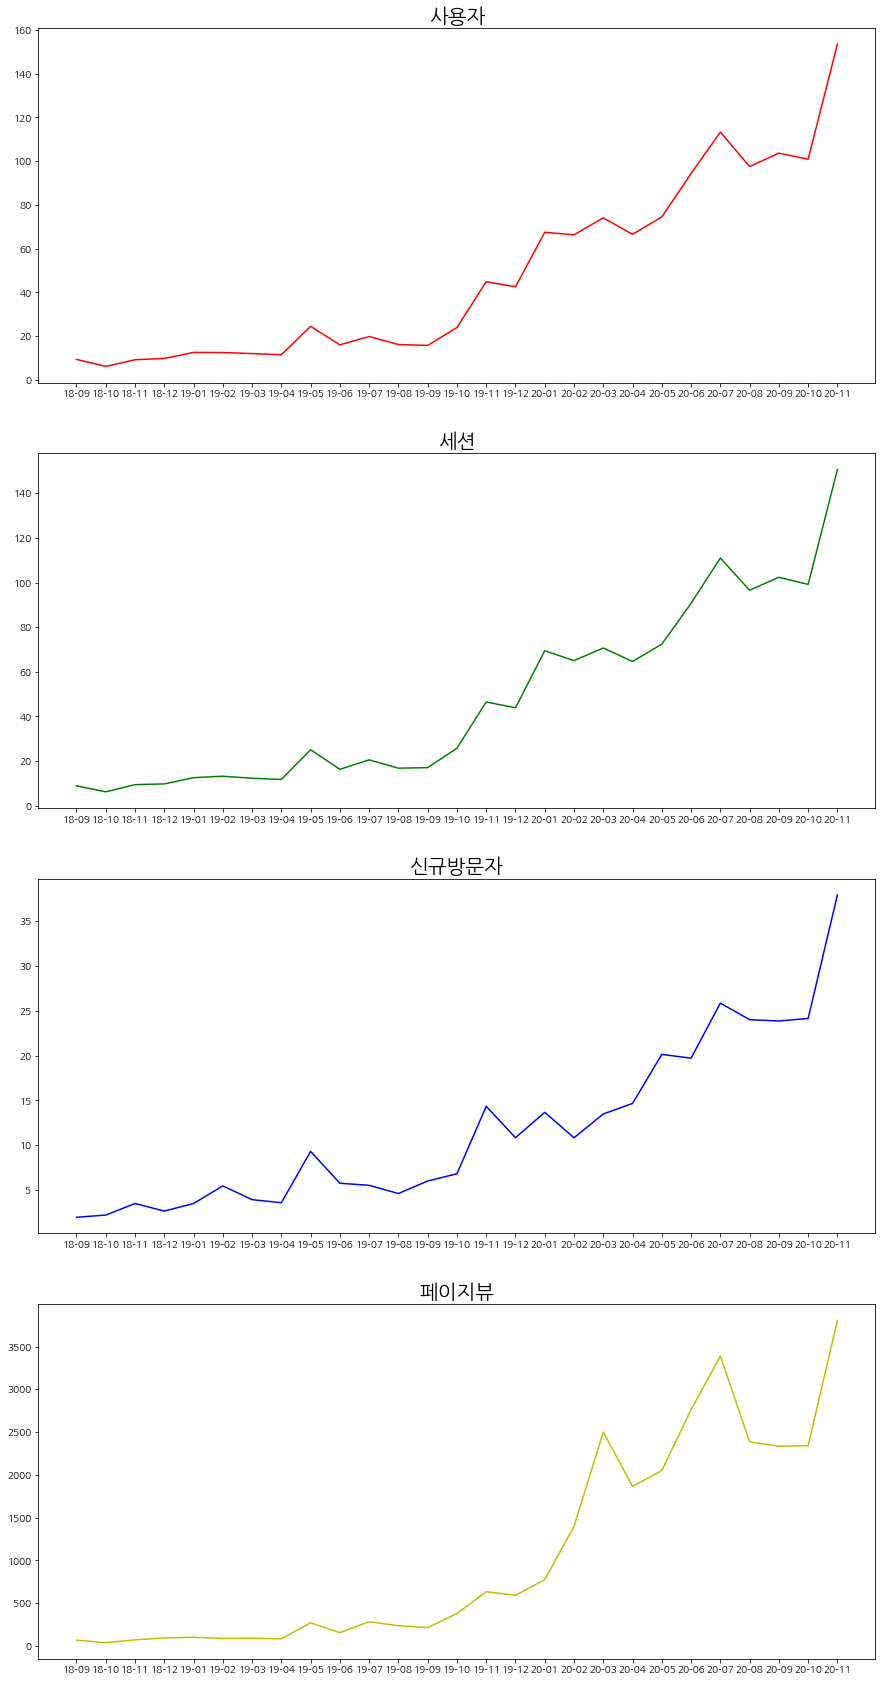

In [186]:
fig, axes = plt.subplots(4, 1, figsize=(15, 30))
axes[0].plot(year_month['년도&월'].dt.strftime('%y-%m'), year_month['사용자'], 'r')
axes[1].plot(year_month['년도&월'].dt.strftime('%y-%m'), year_month['세션'], 'g')
axes[2].plot(year_month['년도&월'].dt.strftime('%y-%m'), year_month['신규방문자'], 'b')
axes[3].plot(year_month['년도&월'].dt.strftime('%y-%m'), year_month['페이지뷰'], 'y')
for i, title in enumerate(['사용자', '세션', '신규방문자', '페이지뷰']):
    axes[i].set_title(title,size=20)
plt.show()

In [191]:
train['요일']=train['DateTime'].dt.weekday_name

In [192]:
day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_day=train.groupby('요일').mean().reindex(day).reset_index()

In [193]:
week_day

,요일,사용자,세션,신규방문자,페이지뷰
0,Monday,53.110251,52.724189,13.171460,1211.181785
1,Tuesday,52.755531,52.321903,13.490413,1190.706490
2,Wednesday,50.351401,49.934366,12.553835,1117.569690
3,Thursday,49.224558,48.973083,12.162979,1058.787242
4,Friday,46.671091,46.381268,11.678466,1026.230826
5,Saturday,33.661504,33.306416,7.775811,722.422198
6,Sunday,33.768275,33.426170,7.387792,744.341374


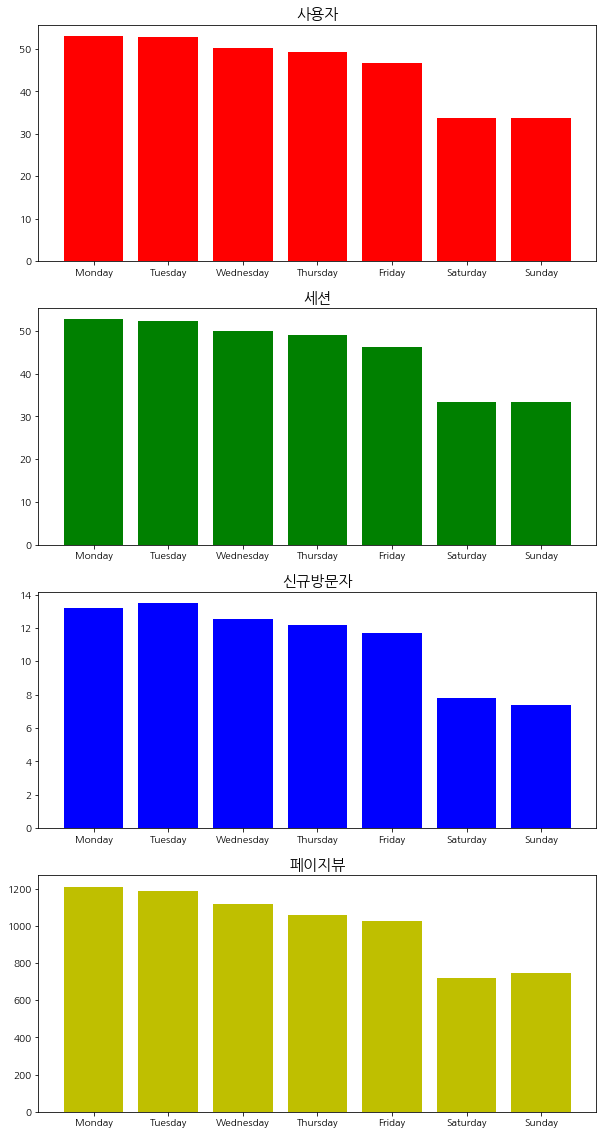

In [265]:
fig, axes = plt.subplots(4, 1, figsize=(10,20))
axes[0].bar(week_day['요일'], week_day['사용자'], color='r')
axes[1].bar(week_day['요일'], week_day['세션'], color='g')
axes[2].bar(week_day['요일'], week_day['신규방문자'], color='b')
axes[3].bar(week_day['요일'], week_day['페이지뷰'], color='y')
for i, title in enumerate(['사용자', '세션', '신규방문자', '페이지뷰']):
    axes[i].set_title(title,size=15)
plt.show()

In [195]:
train['시간']=train['DateTime'].dt.hour
hour=train.groupby('시간').mean().reset_index()

In [196]:
hour

,시간,사용자,세션,신규방문자,페이지뷰
0,0,46.270202,50.710859,10.125000,1064.257576
1,1,29.064394,27.231061,6.170455,623.564394
2,2,18.179293,17.118687,3.853535,379.474747
3,3,11.486111,10.780303,2.606061,236.808081
4,4,7.443182,7.023990,1.827020,141.917929
5,5,5.949495,5.787879,1.583333,107.553030
6,6,7.066919,7.011364,2.066919,108.974747
7,7,12.013889,12.166667,3.362374,174.809343
8,8,24.150253,24.806818,6.857323,381.575758
9,9,44.409091,45.780303,12.150253,860.137626


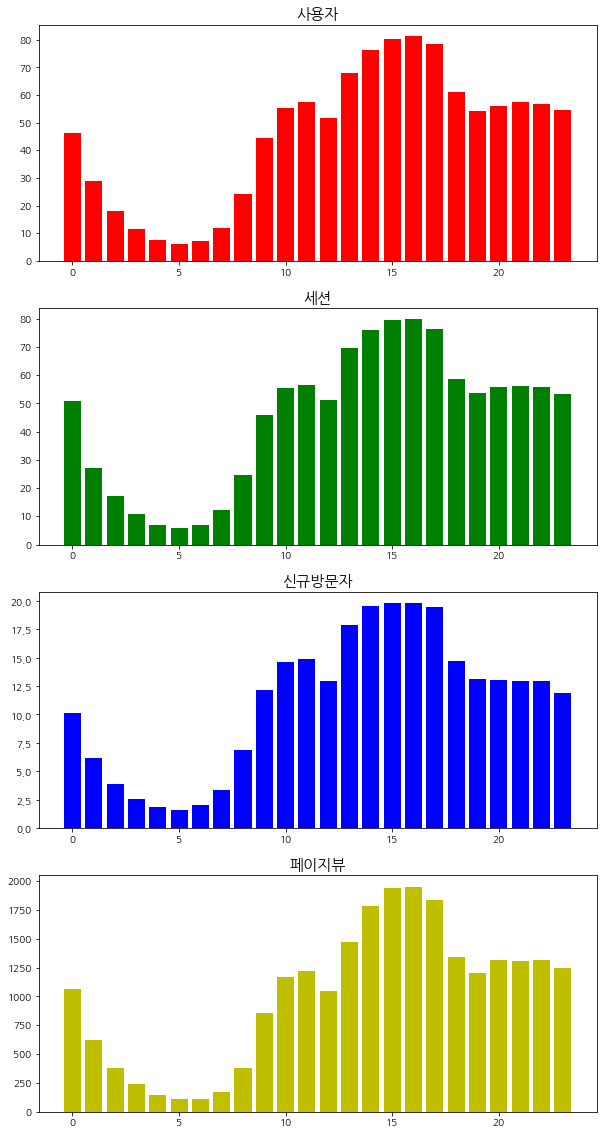

In [264]:
fig, axes = plt.subplots(4, 1, figsize=(10,20))
axes[0].bar(hour['시간'], hour['사용자'], color='r')
axes[1].bar(hour['시간'], hour['세션'], color='g')
axes[2].bar(hour['시간'], hour['신규방문자'], color='b')
axes[3].bar(hour['시간'], hour['페이지뷰'], color='y')
for i, title in enumerate(['사용자', '세션', '신규방문자', '페이지뷰']):
    axes[i].set_title(title,size=15)
plt.show()

# user.csv 

In [359]:
user=pd.read_csv('info_user.csv',encoding='cp949',index_col=0)

In [360]:
user=user.dropna()

In [361]:
user=user.reset_index(drop=True)

In [362]:
user.columns=['유저 id','아이디 생성 시점','대회 참여 횟수','코드 공유 횟수','토론 횟수','국가','파이썬 수준','데이터 사이언스 수준']

In [363]:
user

,유저 id,아이디 생성 시점,대회 참여 횟수,코드 공유 횟수,토론 횟수,국가,파이썬 수준,데이터 사이언스 수준
0,15994.0,2017-05-02 23:58,94.0,306.0,477.0,82.0,1.0,1.0
1,19195.0,2018-08-08 18:21,1.0,0.0,0.0,82.0,1.0,1.0
2,16339.0,2018-08-08 19:57,1.0,0.0,0.0,82.0,1.0,1.0
3,7290.0,2018-08-08 19:59,0.0,0.0,0.0,82.0,1.0,1.0
4,21287.0,2018-08-08 20:26,0.0,0.0,0.0,82.0,1.0,1.0
...,...,...,...,...,...,...,...,...
21687,11584.0,2020-12-08 22:53,1.0,0.0,0.0,82.0,1.0,1.0
21688,6337.0,2020-12-08 22:54,1.0,0.0,0.0,82.0,1.0,1.0
21689,2505.0,2020-12-08 23:07,1.0,0.0,0.0,82.0,1.0,1.0
21690,14182.0,2020-12-08 23:09,1.0,0.0,0.0,82.0,1.0,1.0


In [364]:
user=user.drop(0)

In [365]:
user_count=user

In [366]:
user_count['아이디 생성 시점']=pd.to_datetime(user_count['아이디 생성 시점'])
user_count['년도&월']=user_count['아이디 생성 시점'].dt.to_period('M')
user_count=user_count.groupby('년도&월').count().reset_index()

In [367]:
user_count

,년도&월,유저 id,아이디 생성 시점,대회 참여 횟수,코드 공유 횟수,토론 횟수,국가,파이썬 수준,데이터 사이언스 수준
0,2018-08,384,384,384,384,384,384,384,384
1,2018-09,187,187,187,187,187,187,187,187
2,2018-10,135,135,135,135,135,135,135,135
3,2018-11,362,362,362,362,362,362,362,362
4,2018-12,249,249,249,249,249,249,249,249
5,2019-01,276,276,276,276,276,276,276,276
6,2019-02,661,661,661,661,661,661,661,661
7,2019-03,233,233,233,233,233,233,233,233
8,2019-04,169,169,169,169,169,169,169,169
9,2019-05,395,395,395,395,395,395,395,395


In [368]:
user_0=user[(user['대회 참여 횟수']==0)&(user['코드 공유 횟수']==0)&(user['토론 횟수']==0) ]

In [369]:
user_0

,유저 id,아이디 생성 시점,대회 참여 횟수,코드 공유 횟수,토론 횟수,국가,파이썬 수준,데이터 사이언스 수준,년도&월
3,7290.0,2018-08-08 19:59:00,0.0,0.0,0.0,82.0,1.0,1.0,2018-08
4,21287.0,2018-08-08 20:26:00,0.0,0.0,0.0,82.0,1.0,1.0,2018-08
5,3828.0,2018-08-08 20:28:00,0.0,0.0,0.0,82.0,1.0,1.0,2018-08
6,404.0,2018-08-08 21:07:00,0.0,0.0,0.0,82.0,1.0,1.0,2018-08
7,1287.0,2018-08-09 09:53:00,0.0,0.0,0.0,82.0,1.0,1.0,2018-08
...,...,...,...,...,...,...,...,...,...
21663,20597.0,2020-12-08 16:10:00,0.0,0.0,0.0,82.0,1.0,1.0,2020-12
21672,4342.0,2020-12-08 19:41:00,0.0,0.0,0.0,82.0,1.0,1.0,2020-12
21673,16929.0,2020-12-08 19:41:00,0.0,0.0,0.0,82.0,1.0,1.0,2020-12
21681,15779.0,2020-12-08 22:20:00,0.0,0.0,0.0,82.0,1.0,1.0,2020-12


In [370]:
user_0['아이디 생성 시점']=pd.to_datetime(user_0['아이디 생성 시점'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [371]:
user_0['년도&월']=user_0['아이디 생성 시점'].dt.to_period('M')
user_0_year_month=user_0.groupby('년도&월').count().reset_index()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [372]:
user_0_year_month

,년도&월,유저 id,아이디 생성 시점,대회 참여 횟수,코드 공유 횟수,토론 횟수,국가,파이썬 수준,데이터 사이언스 수준
0,2018-08,296,296,296,296,296,296,296,296
1,2018-09,111,111,111,111,111,111,111,111
2,2018-10,79,79,79,79,79,79,79,79
3,2018-11,227,227,227,227,227,227,227,227
4,2018-12,142,142,142,142,142,142,142,142
5,2019-01,189,189,189,189,189,189,189,189
6,2019-02,498,498,498,498,498,498,498,498
7,2019-03,153,153,153,153,153,153,153,153
8,2019-04,100,100,100,100,100,100,100,100
9,2019-05,259,259,259,259,259,259,259,259


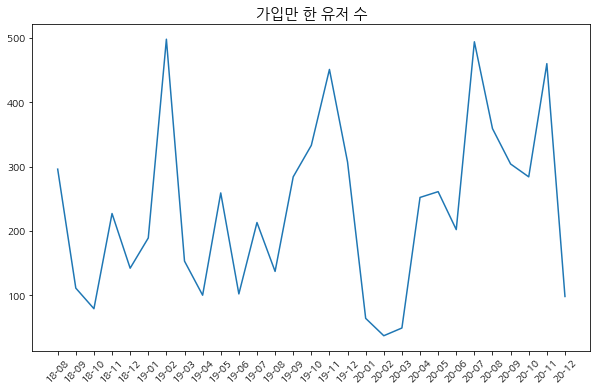

In [373]:
plt.figure(figsize=(10,6))
plt.plot(user_0_year_month['년도&월'].dt.strftime('%y-%m'),user_0_year_month['유저 id'])
plt.title('가입만 한 유저 수',size=15)
plt.xticks(rotation=45)
plt.show()

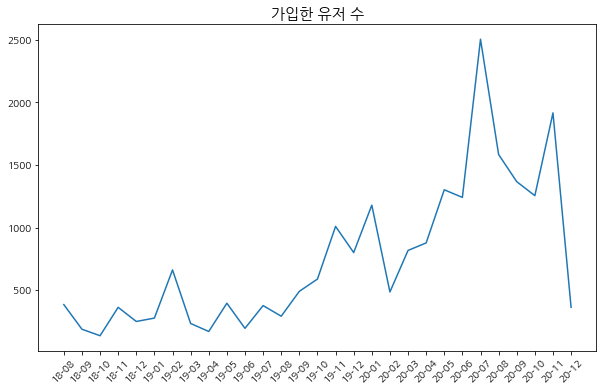

In [374]:
plt.figure(figsize=(10,6))
plt.plot(user_count['년도&월'].dt.strftime('%y-%m'),user_count['유저 id'])
plt.title('가입한 유저 수',size=15)
plt.xticks(rotation=45)
plt.show()

In [375]:
user_count=user_count.loc[:,['년도&월','유저 id']]
user_count.rename(columns={'유저 id':'가입한 유저 수'},inplace=True)
user_count['가입만 한 유저 수']=user_0_year_month['유저 id']

In [384]:
user_count=user_count.set_index('년도&월')

[]

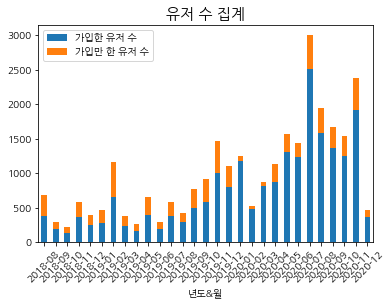

In [385]:
user_count.plot(kind='bar',stacked=True)
plt.title('유저 수 집계',size=15)
plt.xticks(rotation=45)
plt.plot()

In [312]:
user_count['비율']=user_count['가입만 한 유저 수']/user_count['가입한 유저 수']*100

In [313]:
user_count

,년도&월,가입한 유저 수,가입만 한 유저 수,비율
0,2018-08,384,296,77.083333
1,2018-09,187,111,59.358289
2,2018-10,135,79,58.518519
3,2018-11,362,227,62.707182
4,2018-12,249,142,57.028112
5,2019-01,276,189,68.478261
6,2019-02,661,498,75.340393
7,2019-03,233,153,65.665236
8,2019-04,169,100,59.171598
9,2019-05,395,259,65.569620


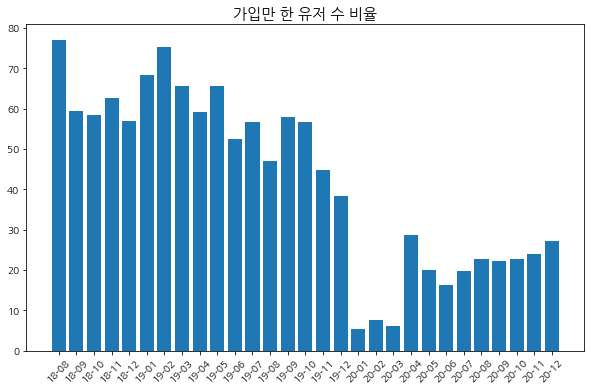

In [358]:
plt.figure(figsize=(10,6))
plt.bar(user_count['년도&월'].dt.strftime('%y-%m'),user_count['비율'])
plt.title('가입만 한 유저 수 비율',size=15)
plt.xticks(rotation=45)
plt.show()

In [326]:
user['국가'].value_counts()

82.0     21481
1.0        104
44.0        38
7.0         11
49.0         7
65.0         5
61.0         4
91.0         4
81.0         4
976.0        3
48.0         3
34.0         3
852.0        3
998.0        3
32.0         2
41.0         2
31.0         2
971.0        1
90.0         1
62.0         1
39.0         1
593.0        1
45.0         1
33.0         1
370.0        1
886.0        1
51.0         1
95.0         1
54.0         1
Name: 국가, dtype: int64

In [332]:
user['파이썬 수준'].value_counts()

1.0    21541
0.0      133
2.0       17
Name: 파이썬 수준, dtype: int64

In [331]:
user['데이터 사이언스 수준'].value_counts()

1.0    21525
0.0      154
2.0       12
Name: 데이터 사이언스 수준, dtype: int64

In [333]:
user['대회 참여 횟수'].value_counts()

1.0     8115
0.0     6751
2.0     2688
3.0     1374
4.0      820
5.0      612
6.0      333
7.0      243
8.0      161
9.0      128
10.0      98
11.0      77
12.0      62
13.0      41
14.0      26
16.0      26
15.0      23
18.0      17
17.0      16
20.0      14
19.0      13
21.0       7
22.0       6
25.0       4
31.0       4
23.0       3
27.0       3
28.0       3
30.0       3
35.0       3
24.0       2
29.0       2
43.0       2
42.0       1
37.0       1
44.0       1
45.0       1
66.0       1
56.0       1
58.0       1
73.0       1
47.0       1
52.0       1
54.0       1
Name: 대회 참여 횟수, dtype: int64

In [336]:
user_=user[(user['대회 참여 횟수']>0)&(user['코드 공유 횟수']>0)&(user['토론 횟수']>0)]

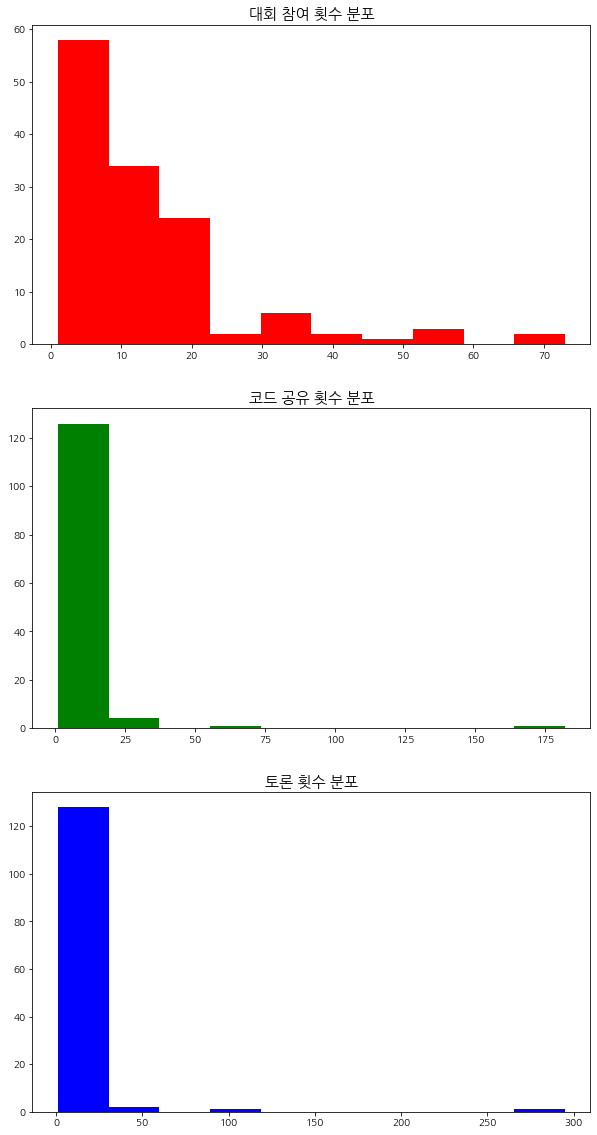

In [344]:
fig, axes = plt.subplots(3, 1, figsize=(10,20))
axes[0].hist(user_['대회 참여 횟수'], color='r')
axes[1].hist(user_['코드 공유 횟수'], color='g')
axes[2].hist(user_['토론 횟수'], color='b')
for i, title in enumerate(['대회 참여 횟수 분포', '코드 공유 횟수 분포', '토론 횟수 분포']):
    axes[i].set_title(title,size=15)
plt.show()

# competiton.csv

In [349]:
competition=pd.read_csv('info_competition.csv',encoding='cp949',index_col=0)

In [350]:
competition=competition.drop(['is_official','name_eng','keyword_eng'],axis='columns')

In [351]:
competition.columns=['대회 id','대회 시작 시점','대회 종료 시점','대회 이름','키워드','참여자 수','최대 팀 멤버','하루 최대 제출 횟수','상금','상금 정보','팀 병합 데드라인','보여지는 위너 수']

In [386]:
competition.head()

,대회 id,대회 시작 시점,대회 종료 시점,대회 이름,키워드,참여자 수,최대 팀 멤버,하루 최대 제출 횟수,상금,상금 정보,팀 병합 데드라인,보여지는 위너 수
0,136,2018-08-14 0:00,2018-09-13 23:59,대출 상점 총 매출 예측 경진대회,"금융 | 소상공인 신용카드 가맹점 빅데이터와 AI로 매출 예측 | 시계열, 회귀 ...",303,5,5,850,"$8,500 + 100,000ZPR",2018-09-13 23:59,3
1,9565,2018-09-15 0:00,2018-10-13 23:59,병원 개/폐업 분류 예측 경진대회,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,448,10,3,350,"$3,500 + 40,000ZPR",2018-10-13 23:59,3
2,17801,2018-10-18 0:00,2018-12-31 23:59,아파트 경매가격 예측 경진대회,금융 | 부동산 아파트 경매 빅데이터와 AI로 경매가 예측 분석 | 회귀 | RMSE,316,10,3,1000,"$10,000 + 120,000ZPR",2018-12-31 23:59,3
3,21265,2018-11-13 0:00,2019-01-31 23:59,아파트 실거래가 예측,금융 | 부동산 빅데이터와 AI를 이용하여 실거래가를 예측 분석 | 회귀 | RMSE,568,10,3,800,"$8,000 + 80,000ZPR",2019-01-31 23:59,3
4,42473,2018-12-25 0:00,2019-01-10 23:59,신용카드 거래 데이터 시각화,"금융 | 신용카드, 시계열, 시각화 | Python, R, Tableau, Spot...",252,5,3,100,"$1,000 + 100,000ZPR",2019-01-10 23:59,3


In [396]:
top10=competition.sort_values(by=['참여자 수'],axis=0,ascending=False)

In [400]:
top10=top10.head(10)

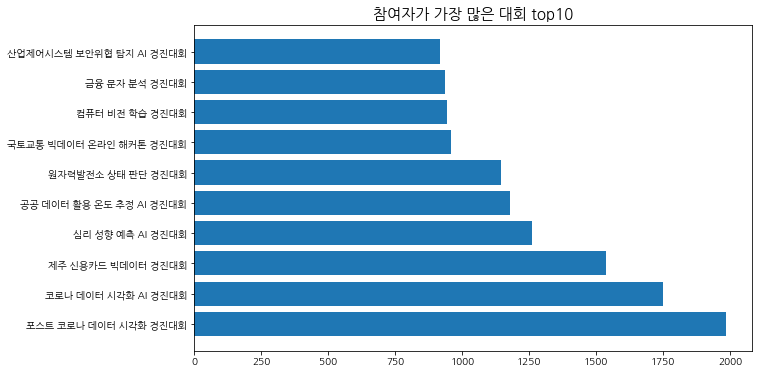

In [401]:
plt.figure(figsize=(10,6))
plt.barh(top10['대회 이름'],top10['참여자 수'])
plt.title('참여자가 가장 많은 대회 top10',size=15)
plt.show()

In [404]:
top10_money=competition.sort_values(by=['상금'],axis=0,ascending=False)
top10_money=top10_money.head(10)

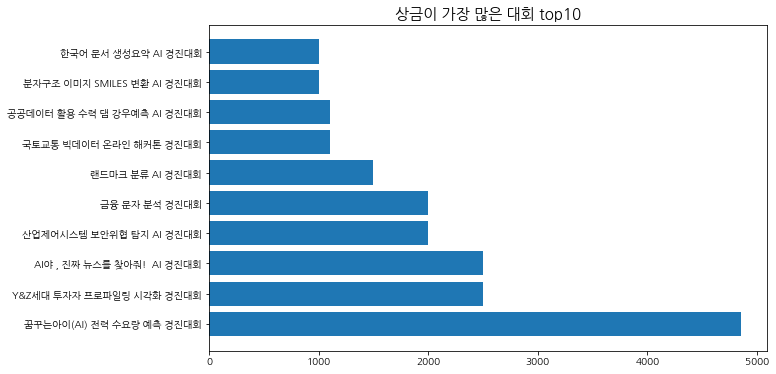

In [405]:
plt.figure(figsize=(10,6))
plt.barh(top10_money['대회 이름'],top10_money['상금'])
plt.title('상금이 가장 많은 대회 top10',size=15)
plt.show()

# sumission.csv

In [75]:
submission=pd.read_csv('info_submission.csv',encoding='cp949',index_col=0)

In [78]:
submission=submission.reset_index(drop=True)

In [95]:
submission=submission.dropna()

In [96]:
submission.columns=['제출 아이디','제출 대회 아이디','팀 아이디','유저 아이디','제출 시점']

In [98]:
submission

,제출 아이디,제출 대회 아이디,팀 아이디,유저 아이디,제출 시점
0,-250918.0,229255.0,5019.0,15880.0,2019-11-24 20:40
1,-250904.0,229611.0,5162.0,19772.0,2019-11-24 20:36
2,-250881.0,235401.0,5042.0,17801.0,2019-11-24 20:24
3,-250873.0,235401.0,5024.0,439.0,2019-11-24 20:23
4,-250860.0,229255.0,4890.0,13722.0,2019-11-24 20:19
...,...,...,...,...,...
101582,483653.0,235658.0,44883.0,11628.0,2020-12-08 23:53
101583,483654.0,235671.0,45009.0,10592.0,2020-12-08 23:56
101584,483655.0,235671.0,45013.0,5987.0,2020-12-08 23:56
101585,483656.0,235658.0,42355.0,6586.0,2020-12-08 23:57


# login.csv

In [406]:
login=pd.read_csv('info_login.csv',encoding='cp949',index_col=0)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [407]:
login=login.reset_index(drop=True)

In [408]:
login=login.dropna()

In [409]:
login

,login_id,user_id,c_time,platform,browser
0,14196.0,19195.0,2018-09-23 1:30,Windows 8,Internet Explorer 10.0
1,14234.0,22045.0,2018-09-23 2:46,Windows,Chrome 67.0.3396.99
2,14256.0,8790.0,2018-09-23 3:35,Windows,Chrome 69.0.3497.100
5,14280.0,10206.0,2018-09-23 13:24,Windows,Chrome 68.0.3440.106
6,14288.0,488.0,2018-09-23 14:05,Windows 7,Chrome 68.0.3440.106
...,...,...,...,...,...
64649,328208.0,16088.0,2019-12-30 23:19,Windows,Firefox 71.0
64650,328209.0,14107.0,2019-12-30 23:21,Windows,Chrome 79.0.3945.88
64651,328210.0,1283.0,2019-12-30 23:21,Windows,Chrome 79.0.3945.88
64652,328218.0,4077.0,2019-12-30 23:24,Windows,Chrome 79.0.3945.88


In [411]:
login.columns=['로그인 id','유저 id','로그인 시점','로그인한 플랫폼','로그인한 브라우저']

In [412]:
login

,로그인 id,유저 id,로그인 시점,로그인한 플랫폼,로그인한 브라우저
0,14196.0,19195.0,2018-09-23 1:30,Windows 8,Internet Explorer 10.0
1,14234.0,22045.0,2018-09-23 2:46,Windows,Chrome 67.0.3396.99
2,14256.0,8790.0,2018-09-23 3:35,Windows,Chrome 69.0.3497.100
5,14280.0,10206.0,2018-09-23 13:24,Windows,Chrome 68.0.3440.106
6,14288.0,488.0,2018-09-23 14:05,Windows 7,Chrome 68.0.3440.106
...,...,...,...,...,...
64649,328208.0,16088.0,2019-12-30 23:19,Windows,Firefox 71.0
64650,328209.0,14107.0,2019-12-30 23:21,Windows,Chrome 79.0.3945.88
64651,328210.0,1283.0,2019-12-30 23:21,Windows,Chrome 79.0.3945.88
64652,328218.0,4077.0,2019-12-30 23:24,Windows,Chrome 79.0.3945.88


In [413]:
login_platform=login.groupby('로그인한 플랫폼').count().reset_index()

In [421]:
login_platform=login_platform.drop(9)

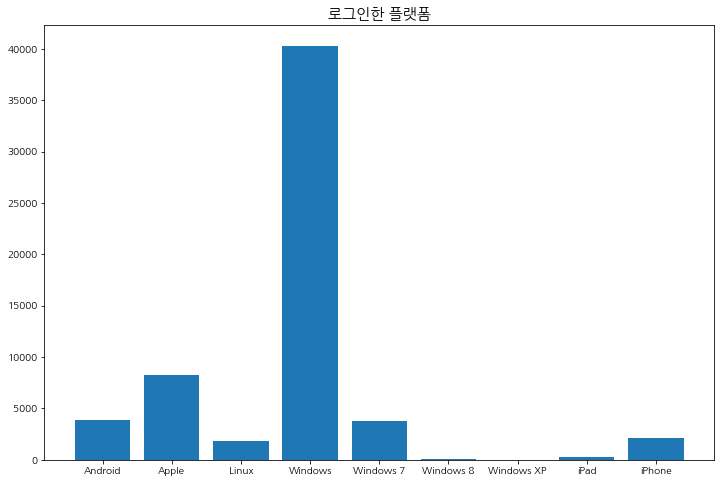

In [422]:
plt.figure(figsize=(12,8))
plt.bar(login_platform['로그인한 플랫폼'],login_platform['유저 id'])
plt.title('로그인한 플랫폼',size=15)
plt.show()

In [433]:
login['로그인한 브라우저']=login['로그인한 브라우저'].str.split(' ').str[0]

In [434]:
login.head()

,로그인 id,유저 id,로그인 시점,로그인한 플랫폼,로그인한 브라우저
0,14196.0,19195.0,2018-09-23 1:30,Windows 8,Internet
1,14234.0,22045.0,2018-09-23 2:46,Windows,Chrome
2,14256.0,8790.0,2018-09-23 3:35,Windows,Chrome
5,14280.0,10206.0,2018-09-23 13:24,Windows,Chrome
6,14288.0,488.0,2018-09-23 14:05,Windows 7,Chrome


In [435]:
login_browser=login.groupby('로그인한 브라우저').count().reset_index()

In [436]:
login_browser

,로그인한 브라우저,로그인 id,유저 id,로그인 시점,로그인한 플랫폼
0,Chrome,52535,52535,52535,52535
1,Firefox,1599,1599,1599,1599
2,Internet,1943,1943,1943,1943
3,Mozilla,8,8,8,8
4,Opera,128,128,128,128
5,Safari,2204,2204,2204,2204
6,iPad,163,163,163,163
7,iPhone,1817,1817,1817,1817


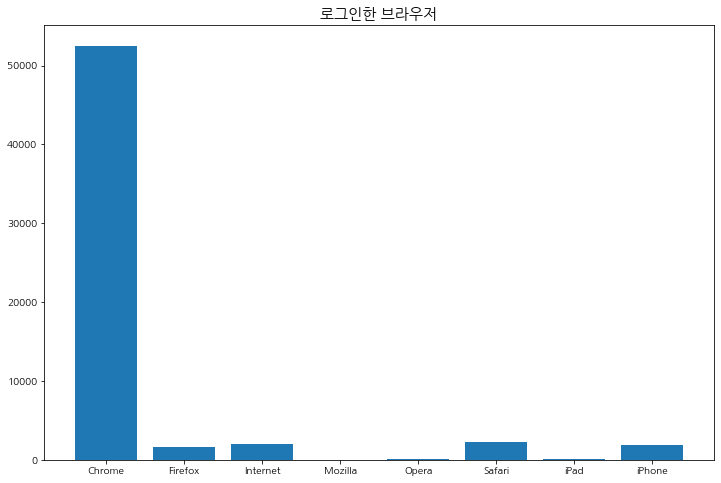

In [437]:
plt.figure(figsize=(12,8))
plt.bar(login_browser['로그인한 브라우저'],login_browser['유저 id'])
plt.title('로그인한 브라우저',size=15)
plt.show()

# RandomForest

In [523]:
train_og=pd.read_csv('train.csv',encoding='cp949')
test_og=pd.read_csv('submission.csv',encoding='cp949')

In [524]:
train_=train_og.copy()

In [525]:
train_['DateTime']=pd.to_datetime(train_['DateTime'])

In [526]:
train_['date'] = train_.DateTime.dt.date

In [527]:
train_=train_.groupby('date').sum().reset_index()

In [528]:
train_=train_.set_index('date')

In [529]:
train_

,사용자,세션,신규방문자,페이지뷰
date,,,,
2018-09-09,281,266,73,1826
2018-09-10,264,247,51,2092
2018-09-11,329,310,58,1998
2018-09-12,300,287,45,2595
2018-09-13,378,344,50,3845
...,...,...,...,...
2020-11-04,4516,4472,1196,112683
2020-11-05,4155,4037,1044,102901
2020-11-06,3663,3576,825,88015


## 사용자

In [530]:
train1=pd.DataFrame(train_["사용자"])

In [531]:
split_date = pd.Timestamp('08-30-2020')
train = train1.loc[:split_date, ]
test = train1.loc[split_date:, ]

In [532]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [533]:
train_sc_df = pd.DataFrame(train_sc, columns=["사용자"], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=["사용자"], index=test.index)

In [534]:
WINDOW_SIZE = 8
train_shift = train_sc_df.copy()
test_shift = test_sc_df.copy()

In [535]:
for s in range(1, WINDOW_SIZE + 1):
    train_shift["shift_사용자_{}".format(s)] = train_shift["사용자"].shift(s)
    test_shift["shift_사용자_{}".format(s)] = test_shift["사용자"].shift(s)

In [536]:
X_train = train_shift.dropna().drop("사용자", axis=1)
y_train = train_shift.dropna()[["사용자"]]

X_test = test_shift.dropna().drop("사용자", axis=1)
y_test = test_shift.dropna()[["사용자"]]

X_train_val = X_train.values
y_train_val = y_train.values

X_test_val = X_test.values
y_test_val = y_test.values

In [537]:
rf_model= RandomForestRegressor(bootstrap=True, n_estimators=30, n_jobs=1, random_state=1104, verbose=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
                      oob_score=False, random_state=1104, verbose=0,
                      warm_start=False)

In [538]:
rf_pred = rf_model.predict(X_test)

In [539]:
print(mean_squared_error(y_test, rf_pred))

0.013144491712390776


In [541]:
rf_result=np.expm1(rf_model.predict(X_test))
test_og["사용자"] = sc.inverse_transform((rf_result[:-2]).reshape(-1, 1))

## 세션

In [542]:
train1=pd.DataFrame(train_["세션"])

In [543]:
split_date = pd.Timestamp('08-30-2020')
train = train1.loc[:split_date, ]
test = train1.loc[split_date:, ]

In [544]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [545]:
train_sc_df = pd.DataFrame(train_sc, columns=["세션"], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=["세션"], index=test.index)

In [547]:
WINDOW_SIZE = 8
train_shift = train_sc_df.copy()
train_sc_df = pd.DataFrame(train_sc, columns=["세션"], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=["세션"], index=test.index)
test_shift = test_sc_df.copy()

In [548]:
for s in range(1, WINDOW_SIZE + 1):
    train_shift["shift_세션_{}".format(s)] = train_shift["세션"].shift(s)
    test_shift["shift_세션_{}".format(s)] = test_shift["세션"].shift(s)

In [549]:
X_train = train_shift.dropna().drop("세션", axis=1)
y_train = train_shift.dropna()[["세션"]]

X_test = test_shift.dropna().drop("세션", axis=1)
y_test = test_shift.dropna()[["세션"]]

X_train_val = X_train.values
y_train_val = y_train.values

X_test_val = X_test.values
y_test_val = y_test.values

In [550]:
rf_model= RandomForestRegressor(bootstrap=True, n_estimators=30, n_jobs=1, random_state=1104, verbose=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
                      oob_score=False, random_state=1104, verbose=0,
                      warm_start=False)

In [551]:
rf_pred = rf_model.predict(X_test)

In [552]:
print(mean_squared_error(y_test, rf_pred))

0.010511707933208164


In [553]:
rf_result=np.expm1(rf_model.predict(X_test))
test_og["세션"] = sc.inverse_transform((rf_result[:-2]).reshape(-1, 1))

## 신규방문자

In [554]:
train1=pd.DataFrame(train_["신규방문자"])

In [555]:
split_date = pd.Timestamp('08-30-2020')
train = train1.loc[:split_date, ]
test = train1.loc[split_date:, ]

In [556]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [557]:
train_sc_df = pd.DataFrame(train_sc, columns=["신규방문자"], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=["신규방문자"], index=test.index)

In [558]:
WINDOW_SIZE = 8
train_shift = train_sc_df.copy()
test_shift = test_sc_df.copy()

In [559]:
for s in range(1, WINDOW_SIZE + 1):
    train_shift["shift_신규방문자_{}".format(s)] = train_shift["신규방문자"].shift(s)
    test_shift["shift_신규방문자_{}".format(s)] = test_shift["신규방문자"].shift(s)

In [560]:
X_train = train_shift.dropna().drop("신규방문자", axis=1)
y_train = train_shift.dropna()[["신규방문자"]]

X_test = test_shift.dropna().drop("신규방문자", axis=1)
y_test = test_shift.dropna()[["신규방문자"]]

X_train_val = X_train.values
y_train_val = y_train.values

X_test_val = X_test.values
y_test_val = y_test.values

In [561]:
rf_model= RandomForestRegressor(bootstrap=True, n_estimators=30, n_jobs=1, random_state=1104, verbose=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
                      oob_score=False, random_state=1104, verbose=0,
                      warm_start=False)

In [562]:
rf_pred = rf_model.predict(X_test)

In [563]:
print(mean_squared_error(y_test, rf_pred))

0.014205301413230849


In [564]:
rf_result=np.expm1(rf_model.predict(X_test))
test_og["신규방문자"] = sc.inverse_transform((rf_result[:-2]).reshape(-1, 1))

## 페이지뷰

In [565]:
train1=pd.DataFrame(train_["페이지뷰"])

In [566]:
split_date = pd.Timestamp('08-30-2020')
train = train1.loc[:split_date, ]
test = train1.loc[split_date:, ]

In [567]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [568]:
train_sc_df = pd.DataFrame(train_sc, columns=["페이지뷰"], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=["페이지뷰"], index=test.index)

In [569]:
WINDOW_SIZE = 8
train_shift = train_sc_df.copy()
test_shift = test_sc_df.copy()

In [570]:
for s in range(1, WINDOW_SIZE + 1):
    train_shift["shift_페이지뷰_{}".format(s)] = train_shift["페이지뷰"].shift(s)
    test_shift["shift_페이지뷰_{}".format(s)] = test_shift["페이지뷰"].shift(s)

In [571]:
X_train = train_shift.dropna().drop("페이지뷰", axis=1)
y_train = train_shift.dropna()[["페이지뷰"]]

X_test = test_shift.dropna().drop("페이지뷰", axis=1)
y_test = test_shift.dropna()[["페이지뷰"]]

X_train_val = X_train.values
y_train_val = y_train.values

X_test_val = X_test.values
y_test_val = y_test.values

In [572]:
rf_model= RandomForestRegressor(bootstrap=True, n_estimators=30, n_jobs=1, random_state=1104, verbose=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
                      oob_score=False, random_state=1104, verbose=0,
                      warm_start=False)

In [573]:
rf_pred = rf_model.predict(X_test)

In [574]:
print(mean_squared_error(y_test, rf_pred))

0.015450300597096274


In [575]:
rf_result=np.expm1(rf_model.predict(X_test))
test_og["페이지뷰"] = sc.inverse_transform((rf_result[:-2]).reshape(-1, 1))

In [576]:
test_og.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,3820.350466,3961.643505,776.467362,87333.536196
1,2020-11-10,3739.961893,3790.078818,752.681909,103618.290320
2,2020-11-11,3603.498245,3569.890892,899.655905,94620.311819
3,2020-11-12,3513.894406,3233.407925,707.313907,86050.551724
4,2020-11-13,3190.634622,3040.363786,644.040415,95461.189955


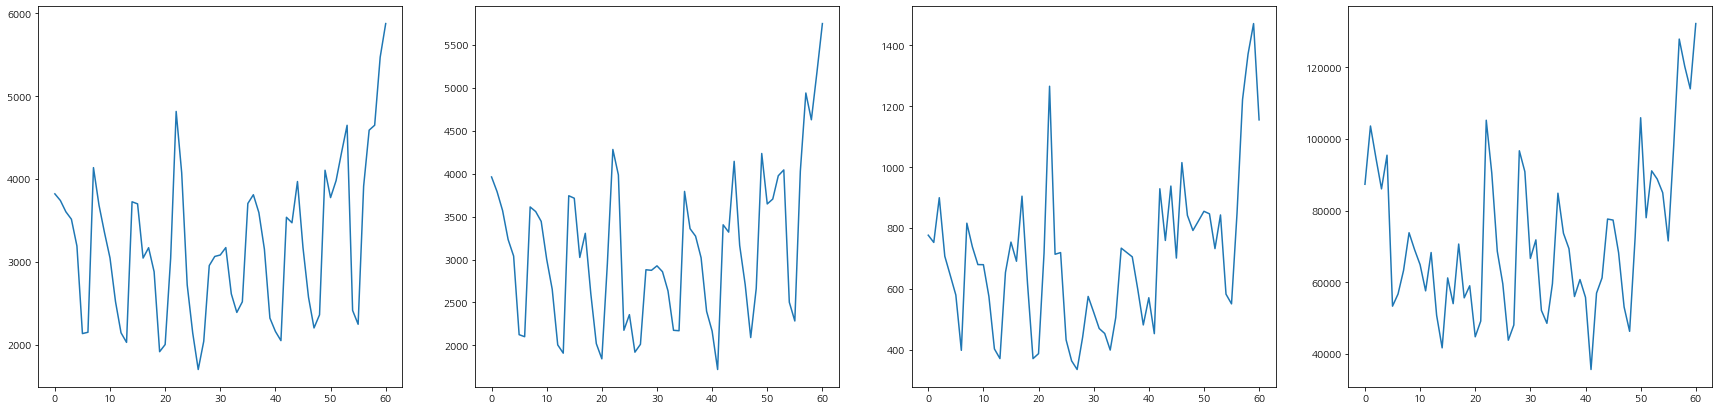

In [606]:
plt.figure(figsize=(30,7))
plt.subplot(141)
plt.plot(test_og["사용자"])
plt.subplot(142)
plt.plot(test_og["세션"])
plt.subplot(143)
plt.plot(test_og["신규방문자"])
plt.subplot(144)
plt.plot(test_og["페이지뷰"])
plt.show()

# facebook Prophet

In [588]:
train_og=pd.read_csv('train.csv',encoding='cp949')

In [589]:
from fbprophet import Prophet
train_fb = train_og.copy()
train_fb['DateTime'] = pd.to_datetime(train_fb.DateTime)
train_fb['ds'] = train_fb.DateTime.dt.date
train_fb = train_fb.groupby('ds').sum().reset_index()
train_fb = train_fb.set_index('ds') 

In [590]:
train_fb

,사용자,세션,신규방문자,페이지뷰
ds,,,,
2018-09-09,281,266,73,1826
2018-09-10,264,247,51,2092
2018-09-11,329,310,58,1998
2018-09-12,300,287,45,2595
2018-09-13,378,344,50,3845
...,...,...,...,...
2020-11-04,4516,4472,1196,112683
2020-11-05,4155,4037,1044,102901
2020-11-06,3663,3576,825,88015


In [591]:
train1 = pd.DataFrame(train_fb["사용자"])
train1_sc = sc.fit_transform(train1)

In [592]:
train1_sc_df = pd.DataFrame(train1_sc, columns=["사용자"], index=train1.index)

In [593]:
train1_sc_df.rename(columns={'사용자':'y'},inplace=True)

In [594]:
train1_sc_df=train1_sc_df.reset_index('ds')
train1_sc_df['ds']=pd.to_datetime(train1_sc_df['ds'])

In [595]:
train1_sc_df

,ds,y
0,2018-09-09,0.051689
1,2018-09-10,0.048551
2,2018-09-11,0.060550
3,2018-09-12,0.055197
4,2018-09-13,0.069596
...,...,...
787,2020-11-04,0.833487
788,2020-11-05,0.766845
789,2020-11-06,0.676020
790,2020-11-07,0.456157


In [596]:
model = Prophet()
model.fit(train1_sc_df)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [287]:
train_pred = model.predict(train1_sc_df)
model.plot(train_pred)

Exception: Model has not been fit.

# LSTM

In [298]:
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from keras.layers import LSTM

Using TensorFlow backend.


In [299]:
train_

,사용자,세션,신규방문자,페이지뷰
date,,,,
2018-09-09,281,266,73,1826
2018-09-10,264,247,51,2092
2018-09-11,329,310,58,1998
2018-09-12,300,287,45,2595
2018-09-13,378,344,50,3845
...,...,...,...,...
2020-11-04,4516,4472,1196,112683
2020-11-05,4155,4037,1044,102901
2020-11-06,3663,3576,825,88015


In [301]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler_fit = scaler.fit(train_)
scaled_train_=scaler_fit.transform(train_)

scaled_train_

array([[0.05168913, 0.04908316, 0.04260355, 0.01173496],
       [0.04855086, 0.04556399, 0.0295858 , 0.01344631],
       [0.06055012, 0.05723282, 0.03372781, 0.01284155],
       ...,
       [0.67601994, 0.66215966, 0.48757396, 0.56624398],
       [0.45615654, 0.44749028, 0.31360947, 0.36918801],
       [0.45984862, 0.44804593, 0.30828402, 0.32479589]])

In [303]:
size=len(train_)
sequence=7
dropout=0.3
epoch=180
batch_size=14
verbose=1


dt_index = pd.date_range(start='20201109', end='20210108')
myIter=len(dt_index)

In [305]:
X_train,Y_train=[],[]

for i in range(size-sequence):
    X_train.append(np.array(scaled_train_[i:i+sequence]))
    Y_train.append(np.array(scaled_train_[i+sequence]))

X_train=np.array(X_train)
Y_train=np.array(Y_train)
print(len(X_train),len(Y_train))

for i in range(myIter):
    print(i+1,"반복")
    model = Sequential()
    model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
    model.add(Dropout(dropout)) 
    model.add(LSTM(64, activation="relu", return_sequences=False))
    model.add(Dropout(dropout)) 
    model.add(Dense(4))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    model_fit = model.fit(X_train, Y_train, 
                          batch_size=batch_size, epochs=epoch,
                          verbose=verbose)

    last_X=np.concatenate((X_train[-1][1:],np.array([Y_train[-1]])),axis=0)
    last_Y = model.predict(np.array([last_X]))
    
    new_X_train=np.concatenate((X_train[:],np.array([last_X])),axis=0)
    new_Y_train=np.concatenate((Y_train[:],last_Y),axis=0)
    
    X_train=np.array(new_X_train)
    Y_train=np.array(new_Y_train)

model.summary()

785 785
1 반복
Epoch 1/180
785/785 [==============================] - 2s 3ms/step - loss: 0.0241
Epoch 2/180
785/785 [==============================] - 1s 1ms/step - loss: 0.0104
Epoch 3/180
785/785 [==============================] - 1s 1ms/step - loss: 0.0100
Epoch 4/180
785/785 [==============================] - 1s 1ms/step - loss: 0.0092A: 0s - loss: 0.0
Epoch 5/180
785/785 [==============================] - 1s 948us/step - loss: 0.0094 0s - loss: 0.0
Epoch 6/180
785/785 [==============================] - 1s 945us/step - loss: 0.0086
Epoch 7/180
785/785 [==============================] - 1s 1ms/step - loss: 0.0081
Epoch 8/180
785/785 [==============================] - 1s 1ms/step - loss: 0.0089
Epoch 9/180
785/785 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 10/180
785/785 [==============================] - 1s 969us/step - loss: 0.0077
Epoch 11/180
785/785 [==============================] - 1s 1ms/step - loss: 0.0078
Epoch 12/180
785/785 [=======================

785/785 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 98/180
785/785 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 99/180
785/785 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 100/180
785/785 [==============================] - 1s 934us/step - loss: 0.0045
Epoch 101/180
785/785 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 102/180
785/785 [==============================] - 1s 967us/step - loss: 0.0043 0s - loss:
Epoch 103/180
785/785 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 104/180
785/785 [==============================] - 1s 957us/step - loss: 0.0048
Epoch 105/180
785/785 [==============================] - 1s 1ms/step - loss: 0.0042A: 0s - loss: 0
Epoch 106/180
785/785 [==============================] - 1s 996us/step - loss: 0.0046
Epoch 107/180
785/785 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 108/180
785/785 [==============================] - 1

786/786 [==============================] - 1s 972us/step - loss: 0.0079
Epoch 13/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0078
Epoch 14/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 15/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 16/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 17/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 18/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 19/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 20/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 21/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 22/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 23/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 24/180
78

786/786 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 110/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 111/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 112/180
786/786 [==============================] - 1s 2ms/step - loss: 0.0043A: 0s - los
Epoch 113/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 114/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 115/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 116/180
786/786 [==============================] - 1s 963us/step - loss: 0.0047
Epoch 117/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 118/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 119/180
786/786 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 120/180
786/786 [==============================] - 1s 994us/step - loss

787/787 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 26/180
787/787 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 27/180
787/787 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 28/180
787/787 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 29/180
787/787 [==============================] - 1s 1ms/step - loss: 0.0065A: 0s - 
Epoch 30/180
787/787 [==============================] - 1s 1ms/step - loss: 0.0059A: 0s -
Epoch 31/180
787/787 [==============================] - 1s 899us/step - loss: 0.0061
Epoch 32/180
787/787 [==============================] - 1s 920us/step - loss: 0.0063
Epoch 33/180
787/787 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 34/180
787/787 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 35/180
787/787 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 36/180
787/787 [==============================] - 1s 1ms/step - loss: 0.005

787/787 [==============================] - 1s 927us/step - loss: 0.0046
Epoch 122/180
787/787 [==============================] - 1s 926us/step - loss: 0.0043
Epoch 123/180
787/787 [==============================] - 1s 961us/step - loss: 0.0042
Epoch 124/180
787/787 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 125/180
787/787 [==============================] - 1s 959us/step - loss: 0.0044
Epoch 126/180
787/787 [==============================] - 1s 954us/step - loss: 0.0042
Epoch 127/180
787/787 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 128/180
787/787 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 129/180
787/787 [==============================] - 1s 2ms/step - loss: 0.0044
Epoch 130/180
787/787 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 131/180
787/787 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 132/180
787/787 [==============================] - 1s 983us/step - loss: 0

788/788 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 38/180
788/788 [==============================] - 1s 972us/step - loss: 0.0060
Epoch 39/180
788/788 [==============================] - 1s 1000us/step - loss: 0.0054
Epoch 40/180
788/788 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 41/180
788/788 [==============================] - 1s 1ms/step - loss: 0.0054A: 0s - loss
Epoch 42/180
788/788 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 43/180
788/788 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 44/180
788/788 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 45/180
788/788 [==============================] - 1s 988us/step - loss: 0.0054
Epoch 46/180
788/788 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 47/180
788/788 [==============================] - 1s 999us/step - loss: 0.0050
Epoch 48/180
788/788 [==============================] - 1s 1ms/step - loss: 0.0

788/788 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 134/180
788/788 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 135/180
788/788 [==============================] - 1s 988us/step - loss: 0.0045
Epoch 136/180
788/788 [==============================] - 1s 929us/step - loss: 0.0036
Epoch 137/180
788/788 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 138/180
788/788 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 139/180
788/788 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 140/180
788/788 [==============================] - 1s 942us/step - loss: 0.0038
Epoch 141/180
788/788 [==============================] - 1s 961us/step - loss: 0.0039
Epoch 142/180
788/788 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 143/180
788/788 [==============================] - 1s 943us/step - loss: 0.0038
Epoch 144/180
788/788 [==============================] - 1s 1ms/step - loss: 0.0

789/789 [==============================] - 1s 970us/step - loss: 0.0055
Epoch 50/180
789/789 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 51/180
789/789 [==============================] - 1s 986us/step - loss: 0.0055
Epoch 52/180
789/789 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 53/180
789/789 [==============================] - 1s 980us/step - loss: 0.0056
Epoch 54/180
789/789 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 55/180
789/789 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 56/180
789/789 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 57/180
789/789 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 58/180
789/789 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 59/180
789/789 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 60/180
789/789 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 61/18

789/789 [==============================] - 1s 944us/step - loss: 0.0042
Epoch 147/180
789/789 [==============================] - 1s 947us/step - loss: 0.0039
Epoch 148/180
789/789 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 149/180
789/789 [==============================] - 1s 968us/step - loss: 0.0047
Epoch 150/180
789/789 [==============================] - 1s 964us/step - loss: 0.0040
Epoch 151/180
789/789 [==============================] - 1s 993us/step - loss: 0.0039
Epoch 152/180
789/789 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 153/180
789/789 [==============================] - 1s 959us/step - loss: 0.0043
Epoch 154/180
789/789 [==============================] - 1s 943us/step - loss: 0.0045
Epoch 155/180
789/789 [==============================] - 1s 976us/step - loss: 0.0045
Epoch 156/180
789/789 [==============================] - 1s 946us/step - loss: 0.0039
Epoch 157/180
789/789 [==============================] - 1s 1ms/step - l

Epoch 62/180
790/790 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 63/180
790/790 [==============================] - 1s 2ms/step - loss: 0.0053
Epoch 64/180
790/790 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 65/180
790/790 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 66/180
790/790 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 67/180
790/790 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 68/180
790/790 [==============================] - 1s 961us/step - loss: 0.0055
Epoch 69/180
790/790 [==============================] - 1s 950us/step - loss: 0.0051
Epoch 70/180
790/790 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 71/180
790/790 [==============================] - 1s 967us/step - loss: 0.0049
Epoch 72/180
790/790 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 73/180
790/790 [==============================] - 1s 954us/step - loss: 0.0

790/790 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 158/180
790/790 [==============================] - 1s 978us/step - loss: 0.0041
Epoch 159/180
790/790 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 160/180
790/790 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 161/180
790/790 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 162/180
790/790 [==============================] - 1s 985us/step - loss: 0.0041
Epoch 163/180
790/790 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 164/180
790/790 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 165/180
790/790 [==============================] - 1s 992us/step - loss: 0.0039
Epoch 166/180
790/790 [==============================] - 1s 946us/step - loss: 0.0043
Epoch 167/180
790/790 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 168/180
790/790 [==============================] - 1s 1ms/step - loss: 0.003

791/791 [==============================] - 1s 953us/step - loss: 0.0051 0s - loss: 0.
Epoch 75/180
791/791 [==============================] - 1s 895us/step - loss: 0.0051
Epoch 76/180
791/791 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 77/180
791/791 [==============================] - 1s 926us/step - loss: 0.0047
Epoch 78/180
791/791 [==============================] - 1s 934us/step - loss: 0.0051
Epoch 79/180
791/791 [==============================] - 1s 941us/step - loss: 0.0048
Epoch 80/180
791/791 [==============================] - 1s 912us/step - loss: 0.0051
Epoch 81/180
791/791 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 82/180
791/791 [==============================] - 1s 905us/step - loss: 0.0051
Epoch 83/180
791/791 [==============================] - 1s 893us/step - loss: 0.0046
Epoch 84/180
791/791 [==============================] - 1s 958us/step - loss: 0.0047
Epoch 85/180
791/791 [==============================] - 1s 1ms/step 

791/791 [==============================] - 1s 909us/step - loss: 0.0037
Epoch 170/180
791/791 [==============================] - 1s 929us/step - loss: 0.0038
Epoch 171/180
791/791 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 172/180
791/791 [==============================] - 1s 880us/step - loss: 0.0041
Epoch 173/180
791/791 [==============================] - 1s 922us/step - loss: 0.0038
Epoch 174/180
791/791 [==============================] - 1s 902us/step - loss: 0.0035
Epoch 175/180
791/791 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 176/180
791/791 [==============================] - 1s 939us/step - loss: 0.0039 0s - lo
Epoch 177/180
791/791 [==============================] - 1s 923us/step - loss: 0.0043
Epoch 178/180
791/791 [==============================] - 1s 844us/step - loss: 0.0036
Epoch 179/180
791/791 [==============================] - ETA: 0s - loss: 0.003 - 1s 1ms/step - loss: 0.0038
Epoch 180/180
791/791 [===================

792/792 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 86/180
792/792 [==============================] - 1s 944us/step - loss: 0.0044
Epoch 87/180
792/792 [==============================] - 1s 919us/step - loss: 0.0044
Epoch 88/180
792/792 [==============================] - 1s 972us/step - loss: 0.0047 0s - loss: 0.00
Epoch 89/180
792/792 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 90/180
792/792 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 91/180
792/792 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 92/180
792/792 [==============================] - 1s 899us/step - loss: 0.0046
Epoch 93/180
792/792 [==============================] - 1s 955us/step - loss: 0.0047
Epoch 94/180
792/792 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 95/180
792/792 [==============================] - 1s 910us/step - loss: 0.0041
Epoch 96/180
792/792 [==============================] - 1s 941us/step - 

792/792 [==============================] - 1s 938us/step - loss: 0.0036
9 반복
Epoch 1/180
793/793 [==============================] - 2s 2ms/step - loss: 0.0218
Epoch 2/180
793/793 [==============================] - 1s 1ms/step - loss: 0.0100
Epoch 3/180
793/793 [==============================] - 1s 1ms/step - loss: 0.0094
Epoch 4/180
793/793 [==============================] - 1s 925us/step - loss: 0.0097
Epoch 5/180
793/793 [==============================] - 1s 906us/step - loss: 0.0097
Epoch 6/180
793/793 [==============================] - 1s 971us/step - loss: 0.0097
Epoch 7/180
793/793 [==============================] - 1s 1ms/step - loss: 0.0092
Epoch 8/180
793/793 [==============================] - 1s 967us/step - loss: 0.0093
Epoch 9/180
793/793 [==============================] - 1s 924us/step - loss: 0.0084
Epoch 10/180
793/793 [==============================] - 1s 1ms/step - loss: 0.0084
Epoch 11/180
793/793 [==============================] - 1s 1ms/step - loss: 0.0081
Epoch 12/

793/793 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 98/180
793/793 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 99/180
793/793 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 100/180
793/793 [==============================] - 1s 941us/step - loss: 0.0044
Epoch 101/180
793/793 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 102/180
793/793 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 103/180
793/793 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 104/180
793/793 [==============================] - 1s 965us/step - loss: 0.0041
Epoch 105/180
793/793 [==============================] - 1s 973us/step - loss: 0.0045
Epoch 106/180
793/793 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 107/180
793/793 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 108/180
793/793 [==============================] - 1s 1ms/step - loss: 0.0043
Ep

794/794 [==============================] - 1s 1ms/step - loss: 0.0079
Epoch 13/180
794/794 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 14/180
794/794 [==============================] - 1s 1ms/step - loss: 0.0079
Epoch 15/180
794/794 [==============================] - 1s 904us/step - loss: 0.0083
Epoch 16/180
794/794 [==============================] - 1s 956us/step - loss: 0.0072
Epoch 17/180
794/794 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 18/180
794/794 [==============================] - 1s 992us/step - loss: 0.0073
Epoch 19/180
794/794 [==============================] - 1s 986us/step - loss: 0.0070
Epoch 20/180
794/794 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 21/180
794/794 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 22/180
794/794 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 23/180
794/794 [==============================] - 1s 945us/step - loss: 0.0071
Epoch 2

794/794 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 109/180
794/794 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 110/180
794/794 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 111/180
794/794 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 112/180
794/794 [==============================] - 1s 972us/step - loss: 0.0049
Epoch 113/180
794/794 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 114/180
794/794 [==============================] - 1s 924us/step - loss: 0.0045
Epoch 115/180
794/794 [==============================] - 1s 980us/step - loss: 0.0046 0s - l
Epoch 116/180
794/794 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 117/180
794/794 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 118/180
794/794 [==============================] - 1s 1ms/step - loss: 0.0043A: 0s - loss: 0. - ETA: 0s - los
Epoch 119/180
794/794 [======================

795/795 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 24/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 25/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 26/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0064A: 0s - lo
Epoch 27/180
795/795 [==============================] - 1s 2ms/step - loss: 0.0063
Epoch 28/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 29/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 30/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 31/180
795/795 [==============================] - ETA: 0s - loss: 0.006 - 1s 1ms/step - loss: 0.0066
Epoch 32/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 33/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 34/180
795/795 [==============================] - 1s 1ms/ste

795/795 [==============================] - 1s 1ms/step - loss: 0.0044A: 0s - loss: 0.0
Epoch 119/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 120/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 121/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 122/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 123/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 124/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 125/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 126/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 127/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0042A: 0s - loss: 0.
Epoch 128/180
795/795 [==============================] - 1s 1ms/step - loss: 0.0046A: 0s - loss:
Epoch 129/180
795/795 [=====================

796/796 [==============================] - 1s 991us/step - loss: 0.0065
Epoch 35/180
796/796 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 36/180
796/796 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 37/180
796/796 [==============================] - 1s 1ms/step - loss: 0.0062
Epoch 38/180
796/796 [==============================] - 1s 937us/step - loss: 0.0061 0s - loss
Epoch 39/180
796/796 [==============================] - 1s 1ms/step - loss: 0.0064A: 0s - 
Epoch 40/180
796/796 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 41/180
796/796 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 42/180
796/796 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 43/180
796/796 [==============================] - 1s 975us/step - loss: 0.0061
Epoch 44/180
796/796 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 45/180
796/796 [==============================] - 1s 980us/step - loss

796/796 [==============================] - 1s 947us/step - loss: 0.0047
Epoch 130/180
796/796 [==============================] - 1s 955us/step - loss: 0.0048
Epoch 131/180
796/796 [==============================] - 1s 962us/step - loss: 0.0052
Epoch 132/180
796/796 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 133/180
796/796 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 134/180
796/796 [==============================] - 1s 946us/step - loss: 0.0047
Epoch 135/180
796/796 [==============================] - 1s 953us/step - loss: 0.0044
Epoch 136/180
796/796 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 137/180
796/796 [==============================] - 1s 994us/step - loss: 0.0046
Epoch 138/180
796/796 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 139/180
796/796 [==============================] - 1s 937us/step - loss: 0.0048
Epoch 140/180
796/796 [==============================] - 1s 1ms/step - loss:

797/797 [==============================] - 1s 960us/step - loss: 0.0064 0s - l
Epoch 46/180
797/797 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 47/180
797/797 [==============================] - 1s 965us/step - loss: 0.0059
Epoch 48/180
797/797 [==============================] - 1s 992us/step - loss: 0.0060
Epoch 49/180
797/797 [==============================] - 1s 916us/step - loss: 0.0056
Epoch 50/180
797/797 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 51/180
797/797 [==============================] - 1s 981us/step - loss: 0.0058
Epoch 52/180
797/797 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 53/180
797/797 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 54/180
797/797 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 55/180
797/797 [==============================] - 1s 1ms/step - loss: 0.0056A: 0s - loss: 0.00
Epoch 56/180
797/797 [==============================] - 1s 1ms/st

797/797 [==============================] - 1s 972us/step - loss: 0.0044
Epoch 141/180
797/797 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 142/180
797/797 [==============================] - 1s 936us/step - loss: 0.0042
Epoch 143/180
797/797 [==============================] - 1s 982us/step - loss: 0.0049
Epoch 144/180
797/797 [==============================] - 1s 928us/step - loss: 0.0041
Epoch 145/180
797/797 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 146/180
797/797 [==============================] - 1s 957us/step - loss: 0.0044
Epoch 147/180
797/797 [==============================] - 1s 955us/step - loss: 0.0042
Epoch 148/180
797/797 [==============================] - 1s 952us/step - loss: 0.0039
Epoch 149/180
797/797 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 150/180
797/797 [==============================] - 1s 982us/step - loss: 0.0045
Epoch 151/180
797/797 [==============================] - 1s 960us/step - l

798/798 [==============================] - 1s 952us/step - loss: 0.0063
Epoch 56/180
798/798 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 57/180
798/798 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 58/180
798/798 [==============================] - 1s 990us/step - loss: 0.0058
Epoch 59/180
798/798 [==============================] - 1s 979us/step - loss: 0.0058
Epoch 60/180
798/798 [==============================] - 1s 947us/step - loss: 0.0057
Epoch 61/180
798/798 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 62/180
798/798 [==============================] - 1s 969us/step - loss: 0.0058
Epoch 63/180
798/798 [==============================] - 1s 972us/step - loss: 0.0056
Epoch 64/180
798/798 [==============================] - 1s 971us/step - loss: 0.0054
Epoch 65/180
798/798 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 66/180
798/798 [==============================] - 1s 1ms/step - loss: 0.0053
Epo

798/798 [==============================] - 1s 998us/step - loss: 0.0040
Epoch 152/180
798/798 [==============================] - 1s 981us/step - loss: 0.0041
Epoch 153/180
798/798 [==============================] - 1s 979us/step - loss: 0.0044
Epoch 154/180
798/798 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 155/180
798/798 [==============================] - 1s 987us/step - loss: 0.0040
Epoch 156/180
798/798 [==============================] - 1s 971us/step - loss: 0.0038
Epoch 157/180
798/798 [==============================] - 1s 952us/step - loss: 0.0038
Epoch 158/180
798/798 [==============================] - 1s 1ms/step - loss: 0.0041A: 0s - l
Epoch 159/180
798/798 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 160/180
798/798 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 161/180
798/798 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 162/180
798/798 [==============================] - 1s 1ms/step 

799/799 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 68/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 69/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 70/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 71/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 72/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 73/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 74/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 75/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 76/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0056A: 0s - loss: 0.00
Epoch 77/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 78/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0050

799/799 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 163/180
799/799 [==============================] - 1s 976us/step - loss: 0.0043
Epoch 164/180
799/799 [==============================] - 1s 2ms/step - loss: 0.0039
Epoch 165/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 166/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 167/180
799/799 [==============================] - 1s 2ms/step - loss: 0.0053A: 1s -
Epoch 168/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 169/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 170/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 171/180
799/799 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 172/180
799/799 [==============================] - 1s 2ms/step - loss: 0.0045
Epoch 173/180
799/799 [==============================] - 1s 1ms/step - loss: 0.00

800/800 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 80/180
800/800 [==============================] - 1s 960us/step - loss: 0.0049
Epoch 81/180
800/800 [==============================] - 1s 942us/step - loss: 0.0054
Epoch 82/180
800/800 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 83/180
800/800 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 84/180
800/800 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 85/180
800/800 [==============================] - 1s 972us/step - loss: 0.0049
Epoch 86/180
800/800 [==============================] - 1s 949us/step - loss: 0.0050
Epoch 87/180
800/800 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 88/180
800/800 [==============================] - 1s 992us/step - loss: 0.0053
Epoch 89/180
800/800 [==============================] - 1s 997us/step - loss: 0.0049
Epoch 90/180
800/800 [==============================] - 1s 954us/step - loss: 0.0048
Epo

800/800 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 175/180
800/800 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 176/180
800/800 [==============================] - 1s 945us/step - loss: 0.0039
Epoch 177/180
800/800 [==============================] - 1s 965us/step - loss: 0.0037
Epoch 178/180
800/800 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 179/180
800/800 [==============================] - 1s 940us/step - loss: 0.0039
Epoch 180/180
800/800 [==============================] - 1s 1ms/step - loss: 0.0039
17 반복
Epoch 1/180
801/801 [==============================] - 2s 3ms/step - loss: 0.0264
Epoch 2/180
801/801 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 3/180
801/801 [==============================] - 1s 1000us/step - loss: 0.0101
Epoch 4/180
801/801 [==============================] - 1s 1ms/step - loss: 0.0098
Epoch 5/180
801/801 [==============================] - 1s 1ms/step - loss: 0.0100
E

801/801 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 92/180
801/801 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 93/180
801/801 [==============================] - 1s 991us/step - loss: 0.0054
Epoch 94/180
801/801 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 95/180
801/801 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 96/180
801/801 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 97/180
801/801 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 98/180
801/801 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 99/180
801/801 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 100/180
801/801 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 101/180
801/801 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 102/180
801/801 [==============================] - 1s 959us/step - loss: 0.0049
Epoch 103/

802/802 [==============================] - 1s 1ms/step - loss: 0.0088
Epoch 8/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0087
Epoch 9/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0095
Epoch 10/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0090
Epoch 11/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0086A: 0s - lo
Epoch 12/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0083A: 0s
Epoch 13/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 14/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0082
Epoch 15/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0077A: 0s - lo
Epoch 16/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0081
Epoch 17/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 18/180
802/802 [==============================] - 1s 1ms/step - loss: 0

802/802 [==============================] - 1s 1ms/step - loss: 0.0056A: 0s -
Epoch 104/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 105/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 106/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 107/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 108/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 109/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 110/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 111/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 112/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 113/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 114/180
802/802 [==============================] - 1s 1ms/step - loss: 0.0047

803/803 [==============================] - 1s 1ms/step - loss: 0.0075A: 0s - los
Epoch 20/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 21/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 22/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 23/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 24/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0077A: 0s - l
Epoch 25/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 26/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 27/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 28/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 29/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 30/180
803/803 [==============================] - 1s 1ms/step - loss: 0.00

803/803 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 116/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 117/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 118/180
803/803 [==============================] - ETA: 0s - loss: 0.004 - 1s 1ms/step - loss: 0.0046
Epoch 119/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 120/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 121/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 122/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 123/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 124/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 125/180
803/803 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 126/180
803/803 [==============================] - 1s 1ms/st

804/804 [==============================] - 1s 1ms/step - loss: 0.0066A: 0s - los
Epoch 31/180
804/804 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 32/180
804/804 [==============================] - 1s 1ms/step - loss: 0.0062
Epoch 33/180
804/804 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 34/180
804/804 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 35/180
804/804 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 36/180
804/804 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 37/180
804/804 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 38/180
804/804 [==============================] - 1s 1ms/step - loss: 0.0060A: 0s - loss: 0.0
Epoch 39/180
804/804 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 40/180
804/804 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 41/180
804/804 [==============================] - 1s 1ms/step - lo

804/804 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 127/180
804/804 [==============================] - 1s 975us/step - loss: 0.0042
Epoch 128/180
804/804 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 129/180
804/804 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 130/180
804/804 [==============================] - 1s 1ms/step - loss: 0.0042A: 0s - loss: 0.
Epoch 131/180
804/804 [==============================] - 1s 965us/step - loss: 0.0048
Epoch 132/180
804/804 [==============================] - 1s 982us/step - loss: 0.0041
Epoch 133/180
804/804 [==============================] - 1s 1ms/step - loss: 0.0044A: 0s - lo
Epoch 134/180
804/804 [==============================] - 1s 981us/step - loss: 0.0040
Epoch 135/180
804/804 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 136/180
804/804 [==============================] - 1s 976us/step - loss: 0.0043
Epoch 137/180
804/804 [==============================]

805/805 [==============================] - 1s 1ms/step - loss: 0.0057A: 0s - lo
Epoch 43/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 44/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 45/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 46/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 47/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 48/180
805/805 [==============================] - 1s 996us/step - loss: 0.0061
Epoch 49/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0058A: 0s - loss: 
Epoch 50/180
805/805 [==============================] - 1s 1000us/step - loss: 0.00570s - 
Epoch 51/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 52/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 53/180
805/805 [==============================] - 1s 1ms/ste

Epoch 138/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 139/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 140/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0042A: 0s - loss: 0.0
Epoch 141/180
805/805 [==============================] - 1s 994us/step - loss: 0.0038
Epoch 142/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 143/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 144/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 145/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 146/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 147/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 148/180
805/805 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 149/180
805/805 [==============================] - 

806/806 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 54/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 55/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 56/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 57/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 58/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 59/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 60/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 61/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 62/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 63/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 64/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 65/180
806/

806/806 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 150/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 151/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 152/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0043A: 0s - loss: 0.
Epoch 153/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 154/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 155/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 156/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 157/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 158/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 159/180
806/806 [==============================] - 1s 1ms/step - loss: 0.0046A: 0s - l
Epoch 160/180
806/806 [==============================] - 1s 1ms/s

807/807 [==============================] - 1s 1ms/step - loss: 0.0058A: 0s - loss: 0
Epoch 67/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 68/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 69/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0056A: 0s - loss: 0.00
Epoch 70/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 71/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 72/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 73/180
807/807 [==============================] - 1s 987us/step - loss: 0.0054
Epoch 74/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 75/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 76/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 77/180
807/807 [==============================] - 1s 1ms/st

807/807 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 163/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 164/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 165/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 166/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 167/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0041A: 0s - loss
Epoch 168/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 169/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 170/180
807/807 [==============================] - 1s 2ms/step - loss: 0.0042
Epoch 171/180
807/807 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 172/180
807/807 [==============================] - 1s 1ms/step - loss: 0.0043A: 0s - loss: 0.00
Epoch 173/180
807/807 [==============================] - 1s 

808/808 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 80/180
808/808 [==============================] - 1s 971us/step - loss: 0.0054
Epoch 81/180
808/808 [==============================] - 1s 957us/step - loss: 0.0048
Epoch 82/180
808/808 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 83/180
808/808 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 84/180
808/808 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 85/180
808/808 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 86/180
808/808 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 87/180
808/808 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 88/180
808/808 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 89/180
808/808 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 90/180
808/808 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 91/180


808/808 [==============================] - 1s 970us/step - loss: 0.0042
Epoch 175/180
808/808 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 176/180
808/808 [==============================] - 1s 963us/step - loss: 0.0043
Epoch 177/180
808/808 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 178/180
808/808 [==============================] - 1s 976us/step - loss: 0.0041
Epoch 179/180
808/808 [==============================] - 1s 968us/step - loss: 0.0039
Epoch 180/180
808/808 [==============================] - 1s 997us/step - loss: 0.0038
25 반복
Epoch 1/180
809/809 [==============================] - 2s 2ms/step - loss: 0.0252
Epoch 2/180
809/809 [==============================] - 1s 975us/step - loss: 0.0117
Epoch 3/180
809/809 [==============================] - 1s 1ms/step - loss: 0.0110
Epoch 4/180
809/809 [==============================] - 1s 964us/step - loss: 0.0100
Epoch 5/180
809/809 [==============================] - 1s 1ms/step - loss: 0.0

809/809 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 92/180
809/809 [==============================] - 1s 979us/step - loss: 0.0052
Epoch 93/180
809/809 [==============================] - 1s 971us/step - loss: 0.0050
Epoch 94/180
809/809 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 95/180
809/809 [==============================] - 1s 967us/step - loss: 0.0049
Epoch 96/180
809/809 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 97/180
809/809 [==============================] - 1s 980us/step - loss: 0.0046
Epoch 98/180
809/809 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 99/180
809/809 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 100/180
809/809 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 101/180
809/809 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 102/180
809/809 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 

810/810 [==============================] - 1s 978us/step - loss: 0.0097
Epoch 7/180
810/810 [==============================] - 1s 1ms/step - loss: 0.0090
Epoch 8/180
810/810 [==============================] - 1s 1ms/step - loss: 0.0098
Epoch 9/180
810/810 [==============================] - 1s 966us/step - loss: 0.0092
Epoch 10/180
810/810 [==============================] - 1s 962us/step - loss: 0.0094
Epoch 11/180
810/810 [==============================] - 1s 1ms/step - loss: 0.0095
Epoch 12/180
810/810 [==============================] - 1s 1ms/step - loss: 0.0083
Epoch 13/180
810/810 [==============================] - 1s 983us/step - loss: 0.0082
Epoch 14/180
810/810 [==============================] - 1s 958us/step - loss: 0.0081
Epoch 15/180
810/810 [==============================] - 1s 954us/step - loss: 0.0086
Epoch 16/180
810/810 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 17/180
810/810 [==============================] - 1s 959us/step - loss: 0.0075
Epoch 

810/810 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 103/180
810/810 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 104/180
810/810 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 105/180
810/810 [==============================] - 1s 990us/step - loss: 0.0050
Epoch 106/180
810/810 [==============================] - 1s 968us/step - loss: 0.0045
Epoch 107/180
810/810 [==============================] - 1s 961us/step - loss: 0.0044
Epoch 108/180
810/810 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 109/180
810/810 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 110/180
810/810 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 111/180
810/810 [==============================] - 1s 971us/step - loss: 0.0045
Epoch 112/180
810/810 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 113/180
810/810 [==============================] - 1s 1ms/step - loss: 0.004

811/811 [==============================] - 1s 1ms/step - loss: 0.0087
Epoch 17/180
811/811 [==============================] - 1s 983us/step - loss: 0.0082
Epoch 18/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 19/180
811/811 [==============================] - 1s 986us/step - loss: 0.0077
Epoch 20/180
811/811 [==============================] - 1s 957us/step - loss: 0.0079
Epoch 21/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 22/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 23/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 24/180
811/811 [==============================] - 1s 954us/step - loss: 0.0073
Epoch 25/180
811/811 [==============================] - 1s 979us/step - loss: 0.0072
Epoch 26/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 27/180
811/811 [==============================] - 1s 972us/step - loss: 0.0074
Epoch

811/811 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 113/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 114/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 115/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 116/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 117/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 118/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 119/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 120/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 121/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 122/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 123/180
811/811 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 

812/812 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 28/180
812/812 [==============================] - 1s 979us/step - loss: 0.0075 0s - 
Epoch 29/180
812/812 [==============================] - 1s 999us/step - loss: 0.0074
Epoch 30/180
812/812 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 31/180
812/812 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 32/180
812/812 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 33/180
812/812 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 34/180
812/812 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 35/180
812/812 [==============================] - 1s 1ms/step - loss: 0.0066A: 0s - 
Epoch 36/180
812/812 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 37/180
812/812 [==============================] - 1s 989us/step - loss: 0.0066
Epoch 38/180
812/812 [==============================] - 1s 982us/step - loss: 0.

812/812 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 125/180
812/812 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 126/180
812/812 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 127/180
812/812 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 128/180
812/812 [==============================] - 1s 975us/step - loss: 0.0045
Epoch 129/180
812/812 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 130/180
812/812 [==============================] - 1s 983us/step - loss: 0.0044
Epoch 131/180
812/812 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 132/180
812/812 [==============================] - 1s 936us/step - loss: 0.0048
Epoch 133/180
812/812 [==============================] - 1s 1ms/step - loss: 0.0049A: 0s - los
Epoch 134/180
812/812 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 135/180
812/812 [==============================] - 1s 1ms/step - lo

813/813 [==============================] - 1s 1ms/step - loss: 0.0065A: 0s - l
Epoch 40/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 41/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 42/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 43/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0062
Epoch 44/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 45/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 46/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 47/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 48/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 49/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 50/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 51

813/813 [==============================] - 1s 984us/step - loss: 0.0038
Epoch 136/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0040A: 0s - loss: 0.0
Epoch 137/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 138/180
813/813 [==============================] - 1s 999us/step - loss: 0.0038
Epoch 139/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 140/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 141/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 142/180
813/813 [==============================] - 1s 989us/step - loss: 0.0044
Epoch 143/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 144/180
813/813 [==============================] - 1s 990us/step - loss: 0.0043
Epoch 145/180
813/813 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 146/180
813/813 [==============================] - 1s 990us

814/814 [==============================] - 1s 2ms/step - loss: 0.0060A: 0s - los - ETA: 0s - los
Epoch 52/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 53/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 54/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 55/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 56/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 57/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 58/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 59/180
814/814 [==============================] - 1s 2ms/step - loss: 0.0053
Epoch 60/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 61/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 62/180
814/814 [==============================] - 1s 1ms/step - los

814/814 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 147/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 148/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 149/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0040A: 0s - loss: 0.00
Epoch 150/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 151/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 152/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0046A: 0s - loss
Epoch 153/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 154/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 155/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 156/180
814/814 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 157/180
814/814 [==============================] - 1s 

815/815 [==============================] - 1s 1ms/step - loss: 0.0051A: 0s - los
Epoch 63/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 64/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0057A: 0s - l
Epoch 65/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 66/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 67/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 68/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 69/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 70/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 71/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 72/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0053A: 0s - l
Epoch 73/180
815/815 [==============================] - 1s 1ms/step - l

815/815 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 159/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 160/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0038A: 0s - loss
Epoch 161/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 162/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 163/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 164/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0039A: 0s - loss: 0
Epoch 165/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0035
Epoch 166/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 167/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0035
Epoch 168/180
815/815 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 169/180
815/815 [==============================] - 1s 1ms

816/816 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 74/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 75/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 76/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0059A: 0s - loss: 0.0 - ETA: 0s - 
Epoch 77/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 78/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 79/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 80/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 81/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 82/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 83/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 84/180
816/816 [==============================] - 1s 1ms/step - 

816/816 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 169/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0043A: 0s - 
Epoch 170/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 171/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 172/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 173/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 174/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 175/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 176/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 177/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 178/180
816/816 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 179/180
816/816 [==============================] - 1s 1ms/step - loss: 0.003

Epoch 84/180
817/817 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 85/180
817/817 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 86/180
817/817 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 87/180
817/817 [==============================] - 1s 1ms/step - loss: 0.0052A: 0s - loss: 0
Epoch 88/180
817/817 [==============================] - 1s 1ms/step - loss: 0.0051A: 0s - loss: 0.
Epoch 89/180
817/817 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 90/180
817/817 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 91/180
817/817 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 92/180
817/817 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 93/180
817/817 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 94/180
817/817 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 95/180
817/817 [==============================] - 

817/817 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 179/180
817/817 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 180/180
817/817 [==============================] - 1s 1ms/step - loss: 0.0041
34 반복
Epoch 1/180
818/818 [==============================] - 2s 3ms/step - loss: 0.0278A: 2s - lo
Epoch 2/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 3/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0108
Epoch 4/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0114
Epoch 5/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0106
Epoch 6/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0097
Epoch 7/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0094
Epoch 8/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0094
Epoch 9/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0091A: 0s - l

818/818 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 94/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 95/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0046A: 0s - loss - ETA: 0s - loss: 0.004
Epoch 96/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 97/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 98/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 99/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 100/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 101/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 102/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 103/180
818/818 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 104/180
818/818 [==============================] - 1s 

819/819 [==============================] - 1s 1ms/step - loss: 0.0098
Epoch 9/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0092
Epoch 10/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 11/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0099A: 0s - loss: 0.01
Epoch 12/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0092
Epoch 13/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0088
Epoch 14/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0089
Epoch 15/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0088
Epoch 16/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0079A: 0s - lo
Epoch 17/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0080A: 0s - loss: 0.0 - ETA: 0s - loss
Epoch 18/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0081
Epoch 19/180
819/819 [=================

C:\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.480739). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
C:\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.241366). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


819/819 [==============================] - 2s 2ms/step - loss: 0.0076
Epoch 30/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0079
Epoch 31/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0077A: 0s - loss: 0.007
Epoch 32/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 33/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 34/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 35/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0066A: 0s - loss: 0.006
Epoch 36/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 37/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0067A: 0s - los
Epoch 38/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0075A: 0s - loss: 0.007
Epoch 39/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 40/180
819/819 [==========

819/819 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 125/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 126/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 127/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 128/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 129/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 130/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 131/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 132/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 133/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0045A: 0s - loss: 0.004
Epoch 134/180
819/819 [==============================] - 1s 1ms/step - loss: 0.0045A: 0s - los
Epoch 135/180
819/819 [==============================] - 1s 

820/820 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 41/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 42/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0062A: 0s - loss: 0.0
Epoch 43/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 44/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0065A: 0s - los
Epoch 45/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0060A: 0s - loss: 0.
Epoch 46/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 47/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 48/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0062
Epoch 49/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 50/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 51/180
820/820 [==============================] - 

820/820 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 136/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 137/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 138/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 139/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0038A: 0s - loss
Epoch 140/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0040A: 0s - loss: 0.00
Epoch 141/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 142/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0035
Epoch 143/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 144/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 145/180
820/820 [==============================] - 1s 1ms/step - loss: 0.0043A: 0s - loss
Epoch 146/180
820/820 [=========================

821/821 [==============================] - 1s 1ms/step - loss: 0.0069A: 0s - loss:
Epoch 49/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 50/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 51/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 52/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 53/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 54/180
821/821 [==============================] - ETA: 0s - loss: 0.006 - 1s 1ms/step - loss: 0.0065
Epoch 55/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 56/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0062
Epoch 57/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 58/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 59/180
821/821 [==============================] - 1s 1ms/

821/821 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 143/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 144/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0042A: 0s - loss: 0.
Epoch 145/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0042A: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.00
Epoch 146/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0043A: 0s
Epoch 147/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 148/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 149/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 150/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 151/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 152/180
821/821 [==============================] - 1s 1ms/step - loss: 0.0042
Epo

822/822 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 57/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 58/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0054A: 0s - los
Epoch 59/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 60/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 61/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 62/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 63/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 64/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 65/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 66/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 67/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 

822/822 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 153/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 154/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 155/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0038A: 0s - loss: 0.003
Epoch 156/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 157/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 158/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 159/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 160/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 161/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 162/180
822/822 [==============================] - 1s 1ms/step - loss: 0.0042A: 0s - loss
Epoch 163/180
822/822 [==============================] - 1s

823/823 [==============================] - 1s 1ms/step - loss: 0.0054A: 0s - los
Epoch 69/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0057A: 0s -
Epoch 70/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 71/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 72/180
823/823 [==============================] - 1s 2ms/step - loss: 0.0052
Epoch 73/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 74/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 75/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0055A: 0s - loss: 0.005
Epoch 76/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 77/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0052A: 0s - loss: 
Epoch 78/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 79/180
823/823 [===========================

823/823 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 163/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0037A: 0s - lo
Epoch 164/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 165/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 166/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 167/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 168/180
823/823 [==============================] - ETA: 0s - loss: 0.003 - 1s 1ms/step - loss: 0.0038
Epoch 169/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 170/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 171/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 172/180
823/823 [==============================] - 1s 1ms/step - loss: 0.0040A: 0s - loss: 0.0 - ETA: 0s - loss: 0.
Epoch 173/180
823/

824/824 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 77/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 78/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 79/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0051A: 0s - loss: - ETA: 0s - loss: 0.0
Epoch 80/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 81/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 82/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 83/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 84/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0048A: 0s - loss: 0
Epoch 85/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0049A: 0s - loss: 0.00
Epoch 86/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 87/180
824/824 [==========

824/824 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 171/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 172/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 173/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 174/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0035A: 0s - loss: 
Epoch 175/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0034
Epoch 176/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 177/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 178/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 179/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0038A: 0s - loss: 0.002 - ETA: 0s - lo
Epoch 180/180
824/824 [==============================] - 1s 1ms/step - loss: 0.0041
41 반복
Epoch 1/180
825/825 [===============

825/825 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 86/180
825/825 [==============================] - 1s 1ms/step - loss: 0.0047A: 0s - loss: 
Epoch 87/180
825/825 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 88/180
825/825 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 89/180
825/825 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 90/180
825/825 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 91/180
825/825 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 92/180
825/825 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 93/180
825/825 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 94/180
825/825 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 95/180
825/825 [==============================] - 1s 1ms/step - loss: 0.0049A: 0s - l
Epoch 96/180
825/825 [==============================] - 1s 1ms/step - loss: 0

825/825 [==============================] - 1s 1ms/step - loss: 0.0037
42 반복
Epoch 1/180
826/826 [==============================] - 2s 3ms/step - loss: 0.0254
Epoch 2/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0123
Epoch 3/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0111
Epoch 4/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0110
Epoch 5/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0095
Epoch 6/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0099
Epoch 7/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0105
Epoch 8/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0092
Epoch 9/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0094
Epoch 10/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0087
Epoch 11/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0084
Epoch 12/180
826/826

826/826 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 98/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 99/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 100/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 101/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 102/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 103/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 104/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 105/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 106/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 107/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 108/180
826/826 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 10

827/827 [==============================] - 1s 1ms/step - loss: 0.0091
Epoch 13/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0086A: 0s - loss: 0.
Epoch 14/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0091
Epoch 15/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0084
Epoch 16/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0081
Epoch 17/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 18/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0080
Epoch 19/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0086A: 0s - loss: 0.008
Epoch 20/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0078
Epoch 21/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0081
Epoch 22/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0085
Epoch 23/180
827/827 [==============================] - 1s 1ms/st

Epoch 108/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 109/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 110/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 111/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 112/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 113/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0044A: 1s 
Epoch 114/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 115/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 116/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 117/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 118/180
827/827 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 119/180
827/827 [==============================] - 1s 1ms/step -

828/828 [==============================] - 1s 1ms/step - loss: 0.0084
Epoch 23/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0079
Epoch 24/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 25/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 26/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0073A: 0s - 
Epoch 27/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 28/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0075A: 0s - lo
Epoch 29/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 30/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 31/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 32/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 33/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0069

828/828 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 119/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 120/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0042A: 0s - 
Epoch 121/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 122/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 123/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 124/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 125/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 126/180
828/828 [==============================] - 1s 2ms/step - loss: 0.0046
Epoch 127/180
828/828 [==============================] - 1s 2ms/step - loss: 0.0044
Epoch 128/180
828/828 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 129/180
828/828 [==============================] - 1s 1ms/step - loss: 0.003

829/829 [==============================] - 1s 1ms/step - loss: 0.0078
Epoch 35/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0074A: 0s - loss: 0.
Epoch 36/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 37/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 38/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 39/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 40/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 41/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 42/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 43/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 44/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 45/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0072A:

829/829 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 130/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 131/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 132/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 133/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 134/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 135/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 136/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0043A: 0s - loss: 0.003 - ETA: 0s - lo
Epoch 137/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0041A: 0s - loss: 0
Epoch 138/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 139/180
829/829 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 140/180
829/829 [==================

830/830 [==============================] - 1s 1ms/step - loss: 0.0068A: 0s - loss: 
Epoch 46/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 47/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 48/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 49/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 50/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 51/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 52/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 53/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0061A: 0s - los
Epoch 54/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 55/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 56/180
830/830 [==============================] - 1s 1ms/step - loss:

830/830 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 141/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 142/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0041A: 0s - lo
Epoch 143/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 144/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 145/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 146/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0042A: 0s 
Epoch 147/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 148/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 149/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 150/180
830/830 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 151/180
830/830 [==============================] - 1s 1ms/step - los

831/831 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 56/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 57/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 58/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 59/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 60/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 61/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0057A: 0s - loss: 0.
Epoch 62/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0062
Epoch 63/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 64/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 65/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 66/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0058A:

831/831 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 151/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 152/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 153/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0037A: 0s - loss: 0.003
Epoch 154/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 155/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 156/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 157/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 158/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 159/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 160/180
831/831 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 161/180
831/831 [==============================] - 1s 1ms/step - 

832/832 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 66/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 67/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 68/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 69/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 70/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 71/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 72/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 73/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 74/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 75/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 76/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 77/180
832/

832/832 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 162/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 163/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 164/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 165/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 166/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0040A: 0s - los
Epoch 167/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 168/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 169/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0040A: 0s - loss: 0
Epoch 170/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 171/180
832/832 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 172/180
832/832 [==============================] - 1s 1ms/

833/833 [==============================] - 1s 1ms/step - loss: 0.0057A: 0s - lo
Epoch 78/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 79/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0057A: 
Epoch 80/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 81/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 82/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 83/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 84/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 85/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 86/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 87/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 88/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0046
Epoc

833/833 [==============================] - 1s 1ms/step - loss: 0.0042A: 0s - 
Epoch 172/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 173/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 174/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 175/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 176/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 177/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 178/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 179/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 180/180
833/833 [==============================] - 1s 1ms/step - loss: 0.0040
50 반복
Epoch 1/180
834/834 [==============================] - 3s 3ms/step - loss: 0.0279
Epoch 2/180
834/834 [==============================] - 1s 1ms/step - loss: 0.0

834/834 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 88/180
834/834 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 89/180
834/834 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 90/180
834/834 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 91/180
834/834 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 92/180
834/834 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 93/180
834/834 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 94/180
834/834 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 95/180
834/834 [==============================] - 1s 1ms/step - loss: 0.0046A: 0s 
Epoch 96/180
834/834 [==============================] - 1s 1ms/step - loss: 0.0049A: 0s - lo
Epoch 97/180
834/834 [==============================] - 1s 1ms/step - loss: 0.0047A: 0s - loss: 
Epoch 98/180
834/834 [==============================] - 1s 1ms/step - 

835/835 [==============================] - 2s 3ms/step - loss: 0.0296
Epoch 2/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0128
Epoch 3/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0126A: 1
Epoch 4/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0109
Epoch 5/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0105
Epoch 6/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0103
Epoch 7/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0106
Epoch 8/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0095
Epoch 9/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0101
Epoch 10/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0094
Epoch 11/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0095
Epoch 12/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0095
Epoch 13/180
835/835 

835/835 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 98/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0053A: 0s
Epoch 99/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0048A: 0s - los
Epoch 100/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0048A: 0s -
Epoch 101/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 102/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 103/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 104/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 105/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 106/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 107/180
835/835 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 108/180
835/835 [==============================] - 1s 1ms/step 

836/836 [==============================] - 1s 1ms/step - loss: 0.0095
Epoch 13/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0093
Epoch 14/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0092A: 0
Epoch 15/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0083
Epoch 16/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 17/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0090
Epoch 18/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0087
Epoch 19/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0083
Epoch 20/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0091
Epoch 21/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0082
Epoch 22/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0079
Epoch 23/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0079
Epoch 24/180


836/836 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 110/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 111/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 112/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 113/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 114/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 115/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 116/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 117/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 118/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 119/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 120/180
836/836 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 

837/837 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 26/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 27/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 28/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0078
Epoch 29/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 30/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 31/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 32/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 33/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 34/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 35/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 36/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 37/180
837/

837/837 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 123/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 124/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 125/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 126/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 127/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 128/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 129/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 130/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 131/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 132/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 133/180
837/837 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 

838/838 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 39/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 40/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 41/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0068A: 
Epoch 42/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 43/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 44/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 45/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 46/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 47/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0066A: 0s -
Epoch 48/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 49/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 5

838/838 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 136/180
838/838 [==============================] - 1s 2ms/step - loss: 0.0051
Epoch 137/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 138/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0045A: 0s - loss: 0.004
Epoch 139/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 140/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 141/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 142/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 143/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0043A: 0s - loss: 0
Epoch 144/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0046A: 0s - lo
Epoch 145/180
838/838 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 146/180
838/838 [=======================

839/839 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 51/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 52/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 53/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 54/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 55/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0062A: 0s - l
Epoch 56/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 57/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 58/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 59/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 60/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 61/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 62

839/839 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 147/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 148/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 149/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0038A: 0s - 
Epoch 150/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 151/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 152/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 153/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 154/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 155/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0045A: 0s - loss: 0.00
Epoch 156/180
839/839 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 157/180
839/839 [==============================] - 1s 1ms/

840/840 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 63/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 64/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 65/180
840/840 [==============================] - 1s 2ms/step - loss: 0.0063
Epoch 66/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 67/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 68/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 69/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0062
Epoch 70/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 71/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 72/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 73/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 74/180
840/

840/840 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 160/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 161/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 162/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 163/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 164/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 165/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 166/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0041A: 
Epoch 167/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 168/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 169/180
840/840 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 170/180
840/840 [==============================] - ETA: 0s - loss: 0.004 - 1s 1ms

841/841 [==============================] - 1s 1ms/step - loss: 0.0062
Epoch 77/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 78/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 79/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 80/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 81/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 82/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 83/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 84/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 85/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 86/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 87/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0062
Epoch 88/180
841/

841/841 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 174/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0045A: 0s - loss: 0.0
Epoch 175/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 176/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 177/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 178/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 179/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 180/180
841/841 [==============================] - 1s 1ms/step - loss: 0.0043
58 반복
Epoch 1/180
842/842 [==============================] - 2s 3ms/step - loss: 0.0297
Epoch 2/180
842/842 [==============================] - 1s 1ms/step - loss: 0.0120A
Epoch 3/180
842/842 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 4/180
842/842 [==============================] - 1s 1ms/step - los

842/842 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 91/180
842/842 [==============================] - 1s 2ms/step - loss: 0.0049A: 0s - loss: 0.004
Epoch 92/180
842/842 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 93/180
842/842 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 94/180
842/842 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 95/180
842/842 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 96/180
842/842 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 97/180
842/842 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 98/180
842/842 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 99/180
842/842 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 100/180
842/842 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 101/180
842/842 [==============================] - 1s 1ms/step - loss: 0.0

843/843 [==============================] - 1s 1ms/step - loss: 0.0103
Epoch 7/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0100A:
Epoch 8/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0098
Epoch 9/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0095
Epoch 10/180
843/843 [==============================] - ETA: 0s - loss: 0.009 - 1s 1ms/step - loss: 0.0091
Epoch 11/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0094
Epoch 12/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0093
Epoch 13/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0097
Epoch 14/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0091
Epoch 15/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 16/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0084
Epoch 17/180
843/843 [==============================] - 1s 1ms/step - loss: 0

843/843 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 104/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 105/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 106/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 107/180
843/843 [==============================] - 1s 2ms/step - loss: 0.0045
Epoch 108/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 109/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 110/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 111/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0047A: 
Epoch 112/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 113/180
843/843 [==============================] - 1s 2ms/step - loss: 0.0045
Epoch 114/180
843/843 [==============================] - 1s 1ms/step - loss: 0.0047
Epo

844/844 [==============================] - 1s 1ms/step - loss: 0.0088
Epoch 21/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 22/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0085
Epoch 23/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0081
Epoch 24/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0079
Epoch 25/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 26/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0082
Epoch 27/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 28/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 29/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 30/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 31/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0074A: 0s - loss: 0
Ep

844/844 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 118/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 119/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 120/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0046A: 0
Epoch 121/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 122/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 123/180
844/844 [==============================] - 1s 2ms/step - loss: 0.0042A: 0s - loss: 
Epoch 124/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 125/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 126/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0042A: 0s -
Epoch 127/180
844/844 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 128/180
844/844 [==============================] - 1s 1ms/s

845/845 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 34/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 35/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 36/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 37/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0070A: 0s - loss: 0.0
Epoch 38/180
845/845 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 39/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 40/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 41/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 42/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 43/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 44/180
845/845 [==============================] - 1s 2ms/step - loss: 0.0069


845/845 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 130/180
845/845 [==============================] - 1s 2ms/step - loss: 0.0044
Epoch 131/180
845/845 [==============================] - 1s 2ms/step - loss: 0.0041A: 0s - loss: 0.004
Epoch 132/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0046A: 0s - loss: 0 - ETA: 0s - loss: 0
Epoch 133/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 134/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 135/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 136/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 137/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 138/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 139/180
845/845 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 140/180
845/845 [=============

In [307]:
print(len(X_train),len(Y_train))

846 846


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

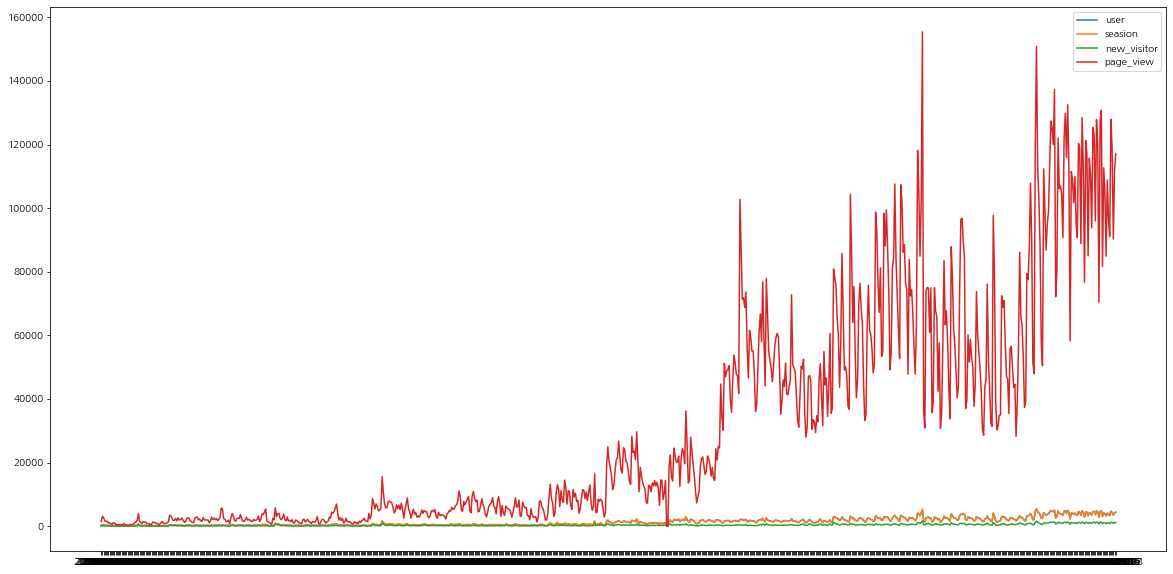

In [308]:
Y_plot=pd.DataFrame(scaler.inverse_transform(Y_train))

Y_plot=Y_plot.rename({0:"사용자",1:"세션",2:"신규방문자",3:"페이지뷰"},axis="columns")
Y_plot

plot_index = pd.date_range(start='20180916', end='20210108')
Y_plot["DateTime"]=plot_index.strftime("%Y-%m-%d").tolist()

Y_plot.set_index('DateTime', inplace=True)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)

ax.plot(Y_plot["사용자"], label='user')
ax.plot(Y_plot["세션"], label='seasion')
ax.plot(Y_plot["신규방문자"], label='new_visitor')
ax.plot(Y_plot["페이지뷰"], label='page_view')

ax.legend()
plt.show()